# <font color=green>deepBreaks Applications</font>
## Modeling the phenotypes and spectral tuning sites of opsin proteins based on amino-acid sequence...  

# <font color=red>Step 0: mySQL DB Setup -</font> Script 0
## *The following script sets up the schema for our vizphiz database.*
```

In [1]:
#All neccessary packages to import for data process steps.
#import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= "Geass5566!!" #change to your password
  )

mycursor = mydb.cursor()

try:
  mycursor.execute("""
  DROP DATABASE vizphiz_db;
  """)
  mydb.commit() 
except:
  "vizphiz_db does not yet exist!"
  pass

mycursor.execute("""
CREATE DATABASE vizphiz_db;
""")
mydb.commit() 

mycursor.execute("""
USE vizphiz_db;
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE scp
(
id int unsigned not null primary key,
genus varchar(50),
species varchar(50),
celltype varchar(50),
cellsubtype varchar(50),
lamdamax decimal(9,5),
error decimal(9,5),
chromophore varchar(50),
method varchar(50),
stage varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE heterologous
(
hetid int unsigned not null primary key,
genus varchar(50),
species varchar(50),
accession varchar(500),
mutations varchar(500),
lamdamax decimal(9,5),
error decimal(9,5),
cellculture varchar(50),
purification varchar(50),
spectrum varchar(50),
sourcetype varchar(50),
refid int,
notes varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE links
(
linkid int unsigned not null primary key,
accession varchar(500),
maxid int,
refid int,
evidence varchar(1000)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE litsearch
(
searchid int,
researcher varchar(50),
month int,
year int,
engine varchar(500),
keywords varchar(500)
);
""")
mydb.commit() 


mycursor.execute("""
CREATE TABLE opsins
(
opsinid int unsigned not null primary key,
genefamily varchar(50),
genenames varchar(50),
genus varchar(50),
phylum varchar(25),
class varchar(25),
species varchar(50),
db varchar(50),
accession varchar(500),
dna varchar(10000),
aa varchar(3333),
refid int
);
""")
mydb.commit()

mycursor.execute("""
CREATE TABLE refs
(
refid int,
doi varchar(1000),
searchid int
);
""")
mydb.commit()

mydb.close()

In [4]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password= "Geass5566!!" #change to your password
  )

mycursor = mydb.cursor()
mycursor.execute("""
USE vizphiz_db;
""")
mydb.commit() 

try:
  mycursor.execute("""
  DROP TABLE mine_n_match;
  """)
  mydb.commit() 

except:
  pass

mycursor.execute("""
CREATE TABLE mine_n_match
(
mnm_id int unsigned not null primary key,
accession varchar(500),
genus varchar(50),
species varchar(50),
lamdamax decimal(9,5),
max_id varchar(1000),
lngcor_id varchar(1000),
aa varchar(3333),
gene_description varchar(1000),
notes varchar(1000)
);
""")
mydb.commit() 
mydb.close()

In [6]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 

# <font color=red>STEP 0: Data Base Setup -</font> Script 1 - Import Literature-Search data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/litsearch.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.litsearch (searchid, researcher, month, year, engine, keywords) VALUES (%s, %s, %s,%s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 2 - Import References into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/references.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.refs (refid, doi, searchid) VALUES (%s, %s, %s)"
      val = (columns[0], columns[1], columns[4])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")
    

# <font color=red>STEP 0: Data Base Setup -</font> Script 3 - Import Heterolgous Data into mySQL


In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/heterologous.tsv', 'r', encoding="utf8")
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")
      print(columns)
      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.heterologous (hetid, genus, species, accession, mutations, lamdamax, error, cellculture, purification, spectrum, sourcetype, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[4], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 0: Data Base Setup -</font> Script 4 - Import Seqience Data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!"
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/opsins.tsv', 'r')
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split("\t")

      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.opsins (opsinid, genefamily, genenames, phylum, class, genus, species, db, accession, dna, aa, refid) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
      val = (columns[0], columns[1], columns[2], columns[3], columns[5], columns[6], columns[7], columns[8], columns[9], columns[10], columns[11], columns [12])
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")



# <font color=red>STEP 0: Data Base Setup -</font> Script 5 - Import Mine-n-Match Data into mySQL

In [ ]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database= "vizphiz",
  password= "Geass5566!!" #change to your password
)

#read file for data
path = 'c:/Users/safra/Documents/GitHub/visual-physiology-opsin-db/vpod_data/VPOD_1.2/raw_database_files'
file1 = open(f'{path}/mine_n_match_curated.tsv', 'r', encoding="utf8")
Lines = file1.readlines()

count=0
for line in Lines:
    if count == 0:
      count+=1
    else:
      columns = line.split(",")
      print(columns)
      mycursor = mydb.cursor()

      sql = "INSERT INTO vizphiz_db.mine_n_match (mnm_id, accession, genus, species, lamdamax, max_id, lngcor_id, aa, gene_description, notes) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"
                
      # **IMPORTANT:** Verify these column indices!
      val = (columns[0], columns[1], columns[2], columns[3], columns[6], columns[8], columns[9], columns[10], columns[11], columns[12])  
                
      print(sql)
      print(val)

      mycursor.execute(sql, val)

      mydb.commit()

      print(mycursor.rowcount, "record inserted.")

# <font color=red>STEP 1: Extract Data Subsets From Vizphiz</font>
### Output = 8 Different Data Subsets 

In [1]:
#All neccessary packages to import for data process steps.
import mysql
import mysql.connector
#install mysql-connector-python // NOT mysql-connector
import re
import os
import datetime 
import subprocess
import shutil 
import csv
import fileinput


In [2]:
#directory preperation
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seq_report_dir = str(f'vpod_1.2_data_splits_{dt_label}')
os.makedirs(seq_report_dir)

#declaring all variables for different sequence data subsets and their metadata
wd_output = f'{seq_report_dir}/wds.txt'
sws_output = f'{seq_report_dir}/uss.txt'
mws_output = f'{seq_report_dir}/mls.txt'
rod_output = f'{seq_report_dir}/rod.txt'
wd_ni_output = f'{seq_report_dir}/vert.txt'
wt_vert_output = f'{seq_report_dir}/wt_vert.txt'
inv_output = f'{seq_report_dir}/inv.txt'
wt_inv_output = f'{seq_report_dir}/wt_inv.txt'
nmoc_output = f'{seq_report_dir}/wt.txt'
mut_output = f'{seq_report_dir}/mut_only.txt'
wh_metadata = f'{seq_report_dir}/wds_meta.tsv'
sw_metadata = f'{seq_report_dir}/uss_meta.tsv'
mw_metadata = f'{seq_report_dir}/mls_meta.tsv'
rh_metadata = f'{seq_report_dir}/rod_meta.tsv'
wd_ni_metadata = f'{seq_report_dir}/vert_meta.tsv'
inv_metadata = f'{seq_report_dir}/inv_meta.tsv'
nmoc_metadata = f'{seq_report_dir}/wt_meta.tsv'
mut_metadata = f'{seq_report_dir}/mut_meta.tsv'
wt_vert_metadata = f'{seq_report_dir}/wt_vert_meta.tsv'
redundant_datapoints = f'{seq_report_dir}/redundant_datapoints_log.tsv'


data_split_list = [wd_output,sws_output,mws_output,rod_output,wd_ni_output,inv_output,nmoc_output,wt_vert_output,mut_output]
meta_data_list = [wh_metadata,sw_metadata,mw_metadata,rh_metadata,wd_ni_metadata,inv_metadata,nmoc_metadata,wt_vert_metadata,mut_metadata]
mnm_meta_list = [wh_metadata,nmoc_metadata,wd_ni_metadata,wt_vert_output,inv_metadata]
mnm_meta_shorthand = ['wds','wt','vert','wt_vert','inv']
#Setting the names for the headers at the top of each metadata file
meta_first_line = "Seq_Id\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tProtein\tRefId\nBovine\t500.0000\tBos_tarus\tRh1\tChordata\tMammalia\tNM_001014890\t\tMNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAKTSAVYNPVIYIMMNKQFRNCMVTTLCCGKNPLGDDEASTTVSKTETSQVAPA\n"
invert_first_line = "Seq_Id\tLambda_Max\tSpecies\tOpsin_Family\tPhylum\tClass\tAccession\tMutations\tProtein\tRefId\nSquid\t473.0000\tTodarodes_pacificus\tRh1\tMollusca\tCephalopoda\t\tX70498\tMGRDLRDNETWWYNPSIVVHPHWREFDQVPDAVYYSLGIFIGICGIIGCGGNGIVIYLFTKTKSLQTPANMFIINLAFSDFTFSLVNGFPLMTISCFLKKWIFGFAACKVYGFIGGIFGFMSIMTMAMISIDRYNVIGRPMAASKKMSHRRAFIMIIFVWLWSVLWAIGPIFGWGAYTLEGVLCNCSFDYISRDSTTRSNILCMFILGFFGPILIIFFCYFNIVMSVSNHEKEMAAMAKRLNAKELRKAQAGANAEMRLAKISIVIVSQFLLSWSPYAVVALLAQFGPLEWVTPYAAQLPVMFAKASAIHNPMIYSVSHPKFREAISQTFPWVLTCCQFDDKETEDDKDAETEIPAGESSDAAPSADAAQMKEMMAMMQKMQQQQAAYPPQGYAPPPQGYPPQGYPPQGYPPQGYPPQGYPPPPQGAPPQGAPPAAPPQGVDNQAYQA\n"
bovine_seq = ">Bovine\nMNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFLLIMLGFPINFLTLYVTVQHKKLRTPLNYILLNLAVADLFMVFGGFTTTLYTSLHGYFVFGPTGCNLEGFFATLGGEIALWSLVVLAIERYVVVCKPMSNFRFGENHAIMGVAFTWVMALACAAPPLVGWSRYIPEGMQCSCGIDYYTPHEETNNESFVIYMFVVHFIIPLIVIFFCYGQLVFTVKEAAAQQQESATTQKAEKEVTRMVIIMVIAFLICWLPYAGVAFYIFTHQGSDFGPIFMTIPAFFAKTSAVYNPVIYIMMNKQFRNCMVTTLCCGKNPLGDDEASTTVSKTETSQVAPA\n"

#misc int variales for the counting loops
m = 0
s = 0
l = 0
r = 0
c = 0
z = 0
q = 0
wt_vert = 0
mut = 0

#regular expressions for filtering different opsin family types 
rod = re.compile('^Rh$|Rh[0-2]|exoRh')
d = re.compile("^NM_001014890.2$|^NM_001014890$|^P02699.1$")
sws_reg = re.compile('^SWS')
uvs_reg = re.compile('^UVS')
mws_reg = re.compile('^MWS')
lws_reg = re.compile('^LWS')
rh1_reg = re.compile('^Rh$|^Rh[0-1]|exoRh')
rh2_reg = re.compile('^Rh2')
non_viz = re.compile('^POps|MOps|GoC|PeroOps')

#Decide if you want to filter out reduant opsin data (identical sequences)
#If 'ignore_filter' set to 'True' then redundant data will be kept
ignore_filter = False
#If 'only_visual_opsins' set to 'True' then only visual opsins will be kept and non-visual opsins (i.e. Pero-opsins) will be ignored/filtered out
only_visual_opsins = True
#If 'keep_conflicts' set to 'True' then redudant sequences with conflicting lmax values will be kept
keep_conflicts = False

In [3]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  database="vizphiz",
  password="Geass5566!!"
) 
mycursor = mydb.cursor()

#sql = "select DISTINCT o.genus,o.species,o.genefamily,o.accession,h.lamdamax,o.aa,o.phylum,o.class,h.mutations,o.refid from vizphiz_db.opsins o, vizphiz_db.heterologous h WHERE (o.accession = h.accession AND o.refid = h.refid); "
sql = """
SELECT DISTINCT 
    o.genus, o.species, o.genefamily, o.accession, 
    h.lamdamax, o.aa, o.phylum, o.class, h.mutations, o.refid 
FROM 
    vizphiz_db.opsins o
JOIN 
    vizphiz_db.heterologous h 
ON 
    o.accession = h.accession AND o.refid = h.refid;
"""
mycursor.execute(sql)
myresult = mycursor.fetchall()
seq_list = []
lmax_list = []
species_list = []
acc_list = []
gene_family_list = []
conflicting_lmax = {}

for x in myresult:
  skip = False
  lmax = x[4]  
  try:
    index = seq_list.index(x[5].strip().replace(' ',''))
    lmax_of_index = lmax_list[index]
    species_of_index = species_list[index]
    acc_of_index = acc_list[index]
    gene_family_of_index = gene_family_list[index]
  except:
    lmax_of_index = None
    
  species_check = str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')
  if (x[5].strip() in seq_list) and (float(x[4]) != float(lmax_of_index)) and (lmax_of_index != None):
    # Redundant sequence found
    # Handle conflicting lmax values
    skip = True
    with open(redundant_datapoints, 'a+') as f:
      f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence but have conflicting lmax values ({lmax_of_index} and {lmax} respectively).\n''')
      if species_of_index != species_check:
        f.write(f'''The two sequences are from different species ({species_of_index} and {species_check}).\n''')
      else:  
        f.write(f'''The two sequences are from the same species ({species_of_index}).\n''')
      f.write(f'''We will be taking the average of all conflicting values, and dropping this entry from the final datasplits.\n''')
      f.write(f'''Note - the gene families of the two sequences are {gene_family_of_index} and {x[2]} - if this raises concern, please double check the entries to resolve this issue.\n\n''')
    
    if keep_conflicts == False:
      # Store conflicting lmax values to modify original with average of all conflicting values
      if acc_of_index not in conflicting_lmax:
          conflicting_lmax[acc_of_index] = [float(lmax_of_index), float(x[4])]  # Convert x[4] to float
      else:
          conflicting_lmax[acc_of_index].append(float(x[4]))
    else:
      skip = False
        
  elif (x[5].strip().replace(' ','') in seq_list) and (x[4] == lmax_of_index):
    # Redundant sequence found
    # Handle identical sequences and lmax values
    # Skipping exactly redundant entries 
    skip = True
    with open(redundant_datapoints, 'a+') as f:
      f.write(f'''Accessions {acc_of_index} and {x[3]} encode the same sequence and have the same lmax values ({lmax_of_index}).''')
      if species_of_index != species_check:
        f.write(f'''\nDespite that the two sequences are from different species ({species_of_index} and {species_check}) we will skip this entry but take the value from the first entry.\nNote - the gene families of the two sequences are {gene_family_of_index} and {x[2]} -  if this raises concern, please double check the entries to resolve this issue.\n\n''')
      else:
        f.write(f'''Because the two sequences are from the same species ({species_of_index}) we will skip this entry and only keep the value from the first entry.\n\n''')
  else:
    # Store new sequence data
    species_list.append(species_check)
    gene_family_list.append(x[2])
    acc_list.append(x[3])
    lmax_list.append(lmax)
    seq_list.append(x[5].strip().replace(' ',''))
  
  if ignore_filter == True:
    skip = False
    
  if only_visual_opsins == True:
    if non_viz.match(x[2]):
      skip = True
      
  if (lmax == 0) or (skip == True):
    pass
  else:    
  #SEQUENCE-DATA SECTION
    #whole-dataset    
    with open(wd_output, 'a') as f:
      if m == 0:
          f.write(bovine_seq)
      if (d.match(x[3])):
        pass
      else:
        m += 1 
        #This makes the fasta format file
        seq = ">S" + str(m)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #vertebrate dataset
    with open(wd_ni_output, 'a') as f:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 0:
          f.write(bovine_seq)
        c += 1 
        #This makes the fasta format file
        seq = ">S" + str(c)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #invertebrate dataset
    with open(inv_output, 'a') as f:
      if (x[6] != "Chordata"):
        if q == 0:
          f.write(">Squid\nMGRDLRDNETWWYNPSIVVHPHWREFDQVPDAVYYSLGIFIGICGIIGCGGNGIVIYLFTKTKSLQTPANMFIINLAFSDFTFSLVNGFPLMTISCFLKKWIFGFAACKVYGFIGGIFGFMSIMTMAMISIDRYNVIGRPMAASKKMSHRRAFIMIIFVWLWSVLWAIGPIFGWGAYTLEGVLCNCSFDYISRDSTTRSNILCMFILGFFGPILIIFFCYFNIVMSVSNHEKEMAAMAKRLNAKELRKAQAGANAEMRLAKISIVIVSQFLLSWSPYAVVALLAQFGPLEWVTPYAAQLPVMFAKASAIHNPMIYSVSHPKFREAISQTFPWVLTCCQFDDKETEDDKDAETEIPAGESSDAAPSADAAQMKEMMAMMQKMQQQQAAYPPQGYAPPPQGYPPQGYPPQGYPPQGYPPQGYPPPPQGAPPQGAPPAAPPQGVDNQAYQA\n")
        q += 1 
        #This makes the fasta format file
        seq = ">S" + str(q)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)
      else:
        pass
    
    #wild-type dataset
    with open(nmoc_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          z += 1 
          #This makes the fasta format file
          seq = ">S" + str(z)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #wild-type vertebrates dataset
    with open(wt_vert_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          wt_vert += 1 
          #This makes the fasta format file
          seq = ">S" + str(wt_vert)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

    #just mutants dataset
    with open(mut_output, 'a') as f:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 0:
          f.write(bovine_seq)
        if(d.match(x[3])):
          pass
        else:
          mut += 1 
          #This makes the fasta format file
          seq = ">M" + str(mut)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)
      else:
        pass
    
    #UVS and SWS dataset
    with open(sws_output, 'a') as f:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        s+=1
        if s == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(s)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #MWS and LWS dataset
    with open(mws_output, 'a') as f:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        l+=1
        if l == 1:
          f.write(bovine_seq)
        #This makes the fasta format file
        seq = ">S" + str(l)
        f.write(seq)
        seq2 = str('\n' + x[5] + '\n')
        f.write(seq2)

    #rods dataset
    with open(rod_output, 'a') as f:
      p = re.compile('Rh[0-2]|exoRh')
      if p.match(x[2]):
        if r == 0:
          f.write(bovine_seq)
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:
          r+=1
          #This makes the fasta format file
          seq = ">S" + str(r)
          f.write(seq)
          seq2 = str('\n' + x[5] + '\n')
          f.write(seq2)

  #METADATA SECTION - same idea and naming convention for the files as above. 
    with open(wh_metadata, 'a') as g:
      if m == 1:
          g.write(meta_first_line)      
      if (d.match(x[3])):
        pass
      else:        
        md =  str("S" + str(m) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(wd_ni_metadata, 'a') as g:
      if x[6] != "Chordata" or d.match(x[3]):
        pass
      else:
        if c == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(c) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(inv_metadata, 'a') as g:
      if (x[6] != "Chordata"):
        if q == 1:
          g.write(invert_first_line)
        md =  str("S" + str(q) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" +str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)
      else:
        pass
          
    with open(sw_metadata, 'a') as g:
      p = re.compile('^SWS|^UVS')
      if p.match(x[2]) and x[6] == "Chordata":
        if s == 1:
          g.write(meta_first_line)
        md =  str("S" + str(s) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mw_metadata, 'a') as g:
      p = re.compile('^MWS|^LWS')
      if p.match(x[2]) and x[6] == "Chordata":
        if l == 1:
          g.write(meta_first_line)        
        md =  str("S" + str(l) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(rh_metadata, 'a') as g:
      p = re.compile('Rh[0-3]|exoRh')

      if p.match(x[2]):
        if r == 1:
          g.write(meta_first_line)      
        if (x[6] != "Chordata") or d.match(x[3]):
          pass
        else:  
          md =  str("S" + str(r) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
          g.write(md)

    with open(nmoc_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if z == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("S" + str(z) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
          
    with open(wt_vert_metadata, 'a') as g:
      if (x[6] != "Chordata") or d.match(x[3]) or ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        pass
      else:
        if wt_vert == 1:
          g.write(meta_first_line)      

        md =  str("S" + str(wt_vert) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
        g.write(md)

    with open(mut_metadata, 'a') as g:
      #p = re.compile('_[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T][0-9]+[G,A,L,M,F,W,K,Q,E,S,P,V,I,C,Y,H,R,N,D,T]')
      if ((len(x[8]) > 1) or ('-' in x[3] and '_(' not in x[3])):
        if mut == 1:
          g.write(meta_first_line)      
        if(d.match(x[3])):
          pass
        else:        
          md =  str("M" + str(mut) + "\t" + str(lmax).strip()) + "\t" + str(x[0]).strip().replace(' ','') + "_" + str(x[1]).strip().replace(' ','')  + "\t" + str(x[2]).strip() + "\t" + str(x[6]).strip() +"\t" + str(x[7]).strip().replace(' ','') + '\t' + x[3].strip() + "\t" + str(x[8]).strip() + "\t" + str(x[5]).strip().replace(' ','') + "\t" + str(x[9]).strip() + "\n"
          g.write(md)
      else:
        pass
      
mydb.close()

# Calculate average lmax and update for sequences flagged as haivng redundant entries with conflicting lmax values in the database
for dsplit in meta_data_list:
    file = fileinput.input(dsplit, inplace=True)
    for line in file:
        modify = False
        fields = line.strip().split("\t")
        lmax = fields[1] 
        accession = fields[6] 
        for key in conflicting_lmax.keys():
            if accession == key:
                modify = True
        if modify == True:
            conflicting_lmax[accession]
            avg_lmax = float(sum(conflicting_lmax[accession])) / float(len(conflicting_lmax[accession]))
            fields[1] = str(avg_lmax)
        print("\t".join(fields))  # Print the modified line, which overwrites the original line in the file
    file.close()    

In [4]:
#Creates an additional sequence file where all the mutants are 
#added to the bottom of the wild-type sequences so they can be aligned for WT model test.
mut_only = open(mut_output).readlines()
mut_nmoc = f'{seq_report_dir}/wt_mut_added.txt'
shutil.copy(nmoc_output , mut_nmoc)
x = 0
for lines in mut_only:
  if x <= 1:
    if x == 0:
      with open(mut_nmoc, 'a') as m:
        m.write('\n')
    else:
      pass
    x+=1
  else:
    with open(mut_nmoc, 'a') as m:
      m.write(lines)

In [5]:
from deepBreaks.preprocessing import read_data
import pandas as pd
import shutil

#seq_report_dir = './vpod_1.2_data_splits_2024-10-19_10-30-09'
path = './mine_n_match/mnm_data/mnm_on_mnm_on_all_dbs_2025-02-05_23-04-27'
mnm_file = f'{path}/mnm_on_vpod_acc_dbs_results_fully_filtered.csv'
mnm_data = read_data(mnm_file, seq_type = None, is_main=False)
mnm_data.head()

Accession      Phylum  Subphylum  \
mnm_id                                                                  
0                 OU342715.1-13552739-13554338    Chordata   Craniata   
1                    STO|Pscil|UVS|contig03244  Arthropoda  Crustacea   
2       DEC|Nenor|LWS|TRINITY_DN39887_c5_g3_i2  Arthropoda  Crustacea   
3                 CM010448.1-19773550-19776969    Chordata   Craniata   
4                     DEC|Sydeb|MWS|KP234272.1  Arthropoda  Crustacea   

               Class          Genus     Species           Full_Species  \
mnm_id                                                                   
0        Actinopteri       Taurulus     bubalis       Taurulus bubalis   
1       Malacostraca  Pseudosquilla     ciliata  Pseudosquilla ciliata   
2       Malacostraca       Nephrops  norvegicus    Nephrops norvegicus   
3        Actinopteri      Carassius     auratus      Carassius auratus   
4       Malacostraca   Systellaspis     debilis   Systellaspis debilis   

        %Identity_Nearest_VPOD_Sequence  prediction_value  LambdaMax  \
mnm_id                                                                 
0                                87.755             510.7     507.00   
1                                55.172             409.6     403.17   
2                                70.642             510.8     515.00   
3                                34.328             444.3     452.00   
4                                40.659             483.8     493.00   

        abs_diff  comp_db_id  \
mnm_id                         
0           3.70        1605   
1           6.43         646   
2           4.20         891   
3           7.70         835   
4           9.20         765   

                                                  Protein Gene_Description  \
mnm_id                                                                       
0       ANGTEGKNFYIPMSNRTGIVRSPFEYQQYYLADPIMFKLLAFYMFF...              rh2   
1       APLPKLDALVALPPALLANLTLRIGRGIRHCSGPKGSVFASRYEVK...          SWS/UVS   
2       ASNNLPSTNPYGNYTVVDTVPKEILHMVDPHWYQFPPMNPLWYGLV...              LWS   
3       DIHVLNVTVYRVSNGGETAIGVYLVILGLSWIGNGVVILLLTKQRK...             opn6   
4       DKMAGTQNASYAMSFTRGGSLISYGYPEGVTLMDLLPEDVKPLIHS...             MWS2   

       Notes  
mnm_id        
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [6]:
mnm_data.shape

(498, 15)

In [7]:
mnm_meta_list = [wh_metadata,nmoc_metadata,wd_ni_metadata,wt_vert_metadata,inv_metadata]
mnm_meta_shorthand = ['wds','wt','vert','wt_vert','inv']

for meta, short_hand in zip(mnm_meta_list,mnm_meta_shorthand):
    
    meta_df = read_data(meta, seq_type = None, is_main=False)
    mnm_data_copy = mnm_data.copy()
    mnm_data_copy.drop_duplicates(subset=['Protein'], keep='first', inplace=True)
    if short_hand == 'vert':
        mnm_data_copy = mnm_data_copy[mnm_data_copy['Phylum'] == 'Chordata']
    elif short_hand == 'inv':
        mnm_data_copy = mnm_data_copy[mnm_data_copy['Phylum'] != 'Chordata']
    else:
        pass
        
    mnm_data_copy = mnm_data_copy[~mnm_data_copy['Protein'].isin(meta_df['Protein'].to_list())]
    mnm_ids = list(range(len(meta_df),len(meta_df)+len(mnm_data_copy['Protein'].to_list())))
    
    combined_ids = meta_df.index.to_list()
    for ids in mnm_ids:
        combined_ids.append(f'MNM{ids}')

    combined_prot = meta_df['Protein'].to_list()
    for prot in mnm_data_copy['Protein']:
        combined_prot.append(prot)
        
    combined_lmax = meta_df['Lambda_Max'].to_list()
    for lmax in mnm_data_copy['LambdaMax']:
        combined_lmax.append(lmax)

    combined_acc = meta_df['Accession'].to_list()
    for acc in mnm_data_copy['Accession']:
        combined_acc.append(acc)

    combined_sp = meta_df['Species'].to_list()
    mnm_sp_list = mnm_data_copy['Genus'] + '_' + mnm_data_copy['Species']
    for sp in mnm_sp_list:
        combined_sp.append(sp)
        
    merged_df = pd.DataFrame(columns=['Accession','Species','Lambda_Max', 'Protein'], index=combined_ids)
    merged_df['Accession'] = combined_acc
    merged_df['Species'] = combined_sp
    merged_df['Lambda_Max']= combined_lmax
    merged_df['Protein']= combined_prot
    merged_df_file = f'{seq_report_dir}/{short_hand}_mnm_meta.csv'
    merged_df.to_csv(path_or_buf=f'./{merged_df_file}', index=True)
    
    vpod_seqs = f'{seq_report_dir}/{short_hand}.txt'
    vpod_mnm_seqs = f'{seq_report_dir}/{short_hand}_mnm.txt'
    shutil.copy(vpod_seqs , vpod_mnm_seqs)
    mnm_seqs = mnm_data_copy['Protein'].to_list()

    with open(vpod_mnm_seqs, 'a') as f:
        for id, seq in zip(mnm_ids, mnm_seqs):
            f.write(f'>MNM{id}\n{seq}\n')
            
    data_split_list.append(vpod_mnm_seqs)
    meta_data_list.append(merged_df_file)

# <font color=red>STEP 2: Align Raw Data w/MAFFT and Format for 'deepBreaks'</font>
## REMINDER - You will need to change the directory for the 'mafft_exe' variable to the one of your own operating system!


In [8]:
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO
output_list = []
mafft_exe = 'C:/Users/safra/mafft-win/mafft.bat' 

for data in data_split_list:
    output = f'./{data.split(".")[0]}.{data.split(".")[1]}_aligned.txt'
    mafft_cline = MafftCommandline(mafft_exe, input=f'./{data}')
    #print(mafft_cline)
    stdout, stderr = mafft_cline()

    with open(output, "w") as handle:
        handle.write(stdout)
        #print(handle)
    align = AlignIO.read(output, "fasta")
    output_list.append(f'{output}')

print(output_list)

['./vpod_1.2_data_splits_2025-02-07_11-32-43/wds_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/uss_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/mls_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/rod_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/vert_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/inv_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_vert_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/mut_only_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/wds_mnm_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_mnm_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/vert_mnm_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_vert_mnm_aligned.txt', './vpod_1.2_data_splits_2025-02-07_11-32-43/inv_mnm_aligned.txt']


In [9]:
#enters list of aligned text files here.
inputs = output_list
deep_breaks_input_data = []

i=0
k = 0
for item in inputs:
    print(item)
    lines = open(inputs[i]).readlines()
    output = f'.{inputs[i].split(".")[1]}.{inputs[i].split(".")[2]}_VPOD_1.2_het.fasta'
    deep_breaks_input_data.append(output)
    print(output)
    file = open(output, 'w')
    m=0
    for line in lines:
        snip = str(lines[k])
        if '>' in snip:
            if m == 0:
                m+=1
            else:
                file.write("\n")
            file.write(snip)
        else:
            entry = ""
            entry = str(snip.replace("\n",""))
            file.write(entry)
        k+=1
    k = 0
    i+=1
    file.close()

./vpod_1.2_data_splits_2025-02-07_11-32-43/wds_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/wds_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/uss_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/uss_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/mls_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/mls_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/rod_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/rod_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/vert_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/vert_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/inv_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/inv_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/wt_aligned.txt
./vpod_1.2_data_splits_2025-02-07_11-32-43/wt_aligned_VPOD_1.2_het.fasta
./vpod_1.2_data_splits_2025-02-07_11-32-43/wt_vert_aligned.txt
./vpod

In [10]:
print(deep_breaks_input_data)

['./vpod_1.2_data_splits_2025-02-07_11-32-43/wds_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/uss_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/mls_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/rod_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/vert_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/inv_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_vert_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/mut_only_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/wds_mnm_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_mnm_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/vert_mnm_aligned_VPOD_1.2_het.fasta', './vpod_1.2_data_splits_2025-02-07_11-32-43/wt_vert_mn

# <font color=red>STEP 3: deepBreaks</font>
## THIS IS A LONG SECTION! 
### **Output** = folder containing all results from model training, including comparison of model performances, an amino-acid site importance report + figures, and the top 5 trained models in a .pkl file format.

In [11]:
# importing deepBreaks libraries 
from deepBreaks.utils_alt2 import get_models, get_scores, get_params, get_empty_params, make_pipeline
from deepBreaks.preprocessing import MisCare, ConstantCare, URareCare, CustomOneHotEncoder
from deepBreaks.preprocessing import FeatureSelection, CollinearCare
from deepBreaks.preprocessing import read_data
from deepBreaks.models import model_compare_cv, finalize_top, importance_from_pipe, mean_importance, summarize_results
from deepBreaks.visualization import plot_scatter, dp_plot, plot_imp_model, plot_imp_all
from deepBreaks.preprocessing import write_fasta
import warnings
import datetime
import os
import shutil 

In [12]:
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [13]:
# defining user params, file pathes, analysis type

#assign your path to folder containing all the datasplits
path = './vpod_1.2_data_splits_2025-02-07_11-32-43'
# path to sequences of interest
seqFileName = f'{path}/wt_mnm_aligned_VPOD_1.2_het.fasta' 
# path to corresponding metadata of interest
metaDataFileName = f'{path}/wt_mnm_meta.csv' 
# name of the phenotype
mt = 'Lambda_Max'

# type of the sequences
seq_type = 'aa'

# type of the analysis if it is a classification model, then we put cl instead of reg
ana_type = 'reg' 

gap_threshold = 0.5

#Whether or not you want to drop the reference sequence from the training data- Usually 'Bovine' or 'Squid'
drop_ref = False


In [14]:
# making a unique directory for saving the reports of the analysis
print('direcory preparation')
dt_label = datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
seqFile = seqFileName.split('/')[2]
#print(seqFile)
seqFile = seqFile.split('.')[0]+'.'+seqFile.split('.')[1]
#print(seqFile)
report_dir = str(seqFile +'_' + mt + '_' + dt_label)
os.makedirs(report_dir)

direcory preparation


In [15]:
%%time
print('reading meta-data')
# importing metadata
meta_data = read_data(metaDataFileName, seq_type = None, is_main=False)
# importing sequences data
print('reading fasta file')

tr = read_data(seqFileName, seq_type = seq_type, is_main=True, gap_threshold=gap_threshold)

shutil.copy2(f'{seqFileName}',report_dir)
write_fasta(dat = tr, fasta_file = f'{seqFile}_gap_dropped.fasta' , report_dir = report_dir)

reading meta-data
reading fasta file
wt_mnm_aligned_VPOD_1.2_het_gap_dropped.fasta was saved successfully
CPU times: total: 812 ms
Wall time: 871 ms


In [16]:
try:
    reference_seq = tr.loc['Bovine'].copy()
    ref_seq_name = 'bovine'
    if drop_ref == True:
        meta_data = meta_data.drop('Bovine')
    #print(bovine)
except:
    reference_seq = tr.loc['Squid'].copy()
    ref_seq_name = 'squid'
    #print(squid)
reference_seq.to_csv(path_or_buf= f'{report_dir}/ref_sequence.csv',index = True,mode="w")

In [17]:
meta_data

Accession                      Species  Lambda_Max  \
Bovine  NM_001014890                    Bos_tarus       500.0   
S1          U57536.1            Neoniphon_sammara       502.0   
S2          U57540.1          Neoniphon_argenteus       502.0   
S3          U57541.1       Neoniphon_aurolineatus       481.0   
S4          U57543.1  Sargocentron_punctatissimum       494.0   
...              ...                          ...         ...   
MNM810      AF003543        Cambarus_ludovicianus       529.0   
MNM811      AF000947            Sepia_officinalis       492.0   
MNM812      AD001674                Manduca_sexta       450.0   
MNM813      AB177984                 Pieris_rapae       540.0   
MNM814      AB007424               Papilio_xuthus       520.0   

                                                  Protein  
Bovine  MNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFL...  
S1      MNGTEGPYFYVPMVNTTGVVRSPYEYPQYYLVNPAAFAVLGAYMFF...  
S2      TEGPYFYVPMVNTTGIVRSPYEYPQYYLVNPAAYAVLGAYMFFLII...  
S3      TEGPDFYIPMVNTSGLVRSPYEYPQYYLVNPAAFAFLGAYMFFLII...  
S4      TEGPFFYIPMVNTSGVVRSPYEYPQYYLVNPAAYAILGAYMFFLII...  
...                                                   ...  
MNM810  LHMIHLHWYQYPPMNPMMYPLLLVFMLITGILCLAGNFVTIWVFMN...  
MNM811  MGRDIPDNETWWYNPTMEVHPHWKQFNQVPDAVYYSLGIFIGICGI...  
MNM812  MATNFTQELYEIGPMAYPLKMISKDVAEHMLGWNIPEEHQDLVHDH...  
MNM813  MAITNLDPAPGVAAMQSFGIHAEAFGSNQTVIDKVLPEMMHLIDPH...  
MNM814  MAIANLEPGMGASEAWGGQAAAFGSNQTVVDKVTPDMMHLIDPHWY...  

[815 rows x 4 columns]

In [18]:
tr = tr.merge(meta_data.loc[:, mt],  left_index=True, right_index=True)
tr.shape

(815, 354)

In [19]:
tr.head()

p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p345 p346 p347 p348 p349  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN    T    S    Q   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    A  NaN  NaN    S    S   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    A  NaN  NaN    S    S   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    A  NaN  NaN    S    S   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    A  NaN  NaN    S    S   

       p350 p351 p352 p353 Lambda_Max  
Bovine    V    A    P    A      500.0  
S1        V    S    P    A      502.0  
S2        V    S    P    A      502.0  
S3        V    S    P    A      481.0  
S4        V    S    P    A      494.0  

[5 rows x 354 columns]

In [20]:
import numpy as np
import csv
import pandas as pd

In [21]:
y = tr.loc[:, mt].values
tr.drop(mt, axis=1, inplace=True)
print('Shape of data is: ', tr.shape)

Shape of data is:  (815, 353)


**Attention**: metadata and sequences data should have the names as their row names and for each sequence their must be a value in the meta data file.

In [22]:
print('metadata looks like this:')
meta_data.head()

metadata looks like this:


Accession                      Species  Lambda_Max  \
Bovine  NM_001014890                    Bos_tarus       500.0   
S1          U57536.1            Neoniphon_sammara       502.0   
S2          U57540.1          Neoniphon_argenteus       502.0   
S3          U57541.1       Neoniphon_aurolineatus       481.0   
S4          U57543.1  Sargocentron_punctatissimum       494.0   

                                                  Protein  
Bovine  MNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFL...  
S1      MNGTEGPYFYVPMVNTTGVVRSPYEYPQYYLVNPAAFAVLGAYMFF...  
S2      TEGPYFYVPMVNTTGIVRSPYEYPQYYLVNPAAYAVLGAYMFFLII...  
S3      TEGPDFYIPMVNTSGLVRSPYEYPQYYLVNPAAFAFLGAYMFFLII...  
S4      TEGPFFYIPMVNTSGVVRSPYEYPQYYLVNPAAYAILGAYMFFLII...

In [23]:
print('sequence data looks like this:')
tr.head()

sequence data looks like this:


p1   p2   p3 p4 p5 p6 p7 p8 p9 p10  ... p344 p345 p346 p347 p348  \
Bovine    M    N    G  T  E  G  P  N  F   Y  ...  NaN  NaN  NaN    T    S   
S1        M    N    G  T  E  G  P  Y  F   Y  ...    S    A  NaN  NaN    S   
S2      NaN  NaN  NaN  T  E  G  P  Y  F   Y  ...    S    A  NaN  NaN    S   
S3      NaN  NaN  NaN  T  E  G  P  D  F   Y  ...    S    A  NaN  NaN    S   
S4      NaN  NaN  NaN  T  E  G  P  F  F   Y  ...    S    A  NaN  NaN    S   

       p349 p350 p351 p352 p353  
Bovine    Q    V    A    P    A  
S1        S    V    S    P    A  
S2        S    V    S    P    A  
S3        S    V    S    P    A  
S4        S    V    S    P    A  

[5 rows x 353 columns]

In [24]:
y_ev = 1239.8 / np.array(y)

### Preprocessing
In this step, we do all these steps:
1. dropping columns with a number of missing values above a certain threshold  
2. dropping zero entropy columns  
3. imputing missing values with the mode of that column  
4. replacing cases with a frequency below a threshold (default 1.5%) with the mode of that column
5. dropping zero entropy columns
6. use statistical tests (each position against the phenotype) and drop columns with p-values below a threshold (default 0.25)
7. one-hot encode the remaining columns
8. calculate the pair-wise distance matrix for all of the columns
9. use the distance matrix for DBSCAN and cluster the correlated positions together
10. keep only one column (closes to center of each cluster) for each group and drop the rest from the training data set

In [25]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.01)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=False)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.01, keep=False))
    ])

In [26]:
%%time
report, top = model_compare_cv(X=tr, y=y, preprocess_pipe=prep_pipeline,
                               models_dict=get_models(ana_type=ana_type, dataset='wt'),
                               scoring=get_scores(ana_type=ana_type),
                               report_dir=report_dir,
                               cv=10, ana_type=ana_type, cache_dir=report_dir)

Fitting rf...
Fitting gbr...
Fitting BayesianRidge...
Fitting xgb...
CPU times: total: 5.67 s
Wall time: 58.3 s


MAE = Mean Absolute Error

MSE = Mean Squared Error

RMSE = Rooted Mean Square Error

MAPE = Mean Absolute % Error - the average magnitude of error produced by a model, or how far off predictions are on average. A MAPE value of 20% means that the average absolute percentage difference between the predictions and the actuals is 20%

In [27]:
report

R2       MAE         MSE       RMSE      MAPE
rf             0.955432  7.014608  128.267293  11.094361  0.014910
gbr            0.954866  7.216650  131.198648  11.296611  0.015310
xgb            0.954082  7.273426  132.578075  11.380095  0.015361
BayesianRidge  0.945658  8.205015  155.638639  12.318399  0.017370

In [28]:
prep_pipeline = make_pipeline(
    steps=[
        ('mc', MisCare(missing_threshold=0.05)),
        ('cc', ConstantCare()),
        ('ur', URareCare(threshold=0.025)),
        ('cc2', ConstantCare()),
        ('one_hot', CustomOneHotEncoder()),
        ('feature_selection', FeatureSelection(model_type=ana_type, alpha=0.10, keep=True)),
        ('collinear_care', CollinearCare(dist_method='correlation', threshold=0.01, keep=True))
    ])

In [29]:
modified_top = []
mtml = []
for model in top:
    modified_top.append(make_pipeline(steps=[('prep', prep_pipeline), model.steps[-1]]))
    my_top_models = str(model[1:])
    #print(my_top_models)
    my_top_models = my_top_models.split("'")[3]
    mtml.append(my_top_models)
    #print(my_top_models)

In [30]:
modified_top[0]

Pipeline(steps=[('prep',
                 Pipeline(steps=[('mc', MisCare(missing_threshold=0.05)),
                                 ('cc', ConstantCare()),
                                 ('ur', URareCare(threshold=0.025)),
                                 ('cc2', ConstantCare()),
                                 ('one_hot', CustomOneHotEncoder()),
                                 ('feature_selection',
                                  FeatureSelection(alpha=0.1, keep=True,
                                                   model_type='reg')),
                                 ('collinear_care',
                                  CollinearCare(dist_method='correlation',
                                                keep=True, threshold=0.01))])),
                ('rf',
                 RandomForestRegressor(bootstrap=False, max_depth=30,
                                       max_features='sqrt', n_estimators=200,
                                       n_jobs=-1, random_state=123))])

In [31]:
%%time
top = finalize_top(X=tr, y=y, top_models=modified_top, grid_param=get_empty_params(),report_dir=report_dir, cv=10)


Tuning rf...
No Grid-Search Specified, fitting model to default parameters.
Tuning gbr...
No Grid-Search Specified, fitting model to default parameters.
Tuning xgb...
No Grid-Search Specified, fitting model to default parameters.
Tuning BayesianRidge...
No Grid-Search Specified, fitting model to default parameters.
CPU times: total: 60 s
Wall time: 13.2 s


In [32]:
%%time
sr = summarize_results(top_models=top, report_dir=report_dir)

CPU times: total: 1.5 s
Wall time: 1.65 s


In [33]:
sr.head()

feature       p_value      score        rf       gbr       xgb  \
0  p1_LTAVQIHRFYGN  2.150060e-01   1.539797  0.000000  0.000000  0.000000   
1             p1_M  1.195369e-01   2.428488  0.000000  0.000000  0.000000   
2             p1_P  3.339046e-04  12.980366  0.013809  0.000824  0.000023   
3           p2_GAP  2.054688e-06  22.872895  0.017241  0.000087  0.000740   
4  p2_KGDMQYHPLFIV  4.551107e-17  73.718251  0.004148  0.000038  0.000426   

   BayesianRidge      mean  
0       0.000000  0.000000  
1       0.000000  0.000000  
2       0.296160  0.077704  
3       0.132196  0.037566  
4       0.101973  0.026646

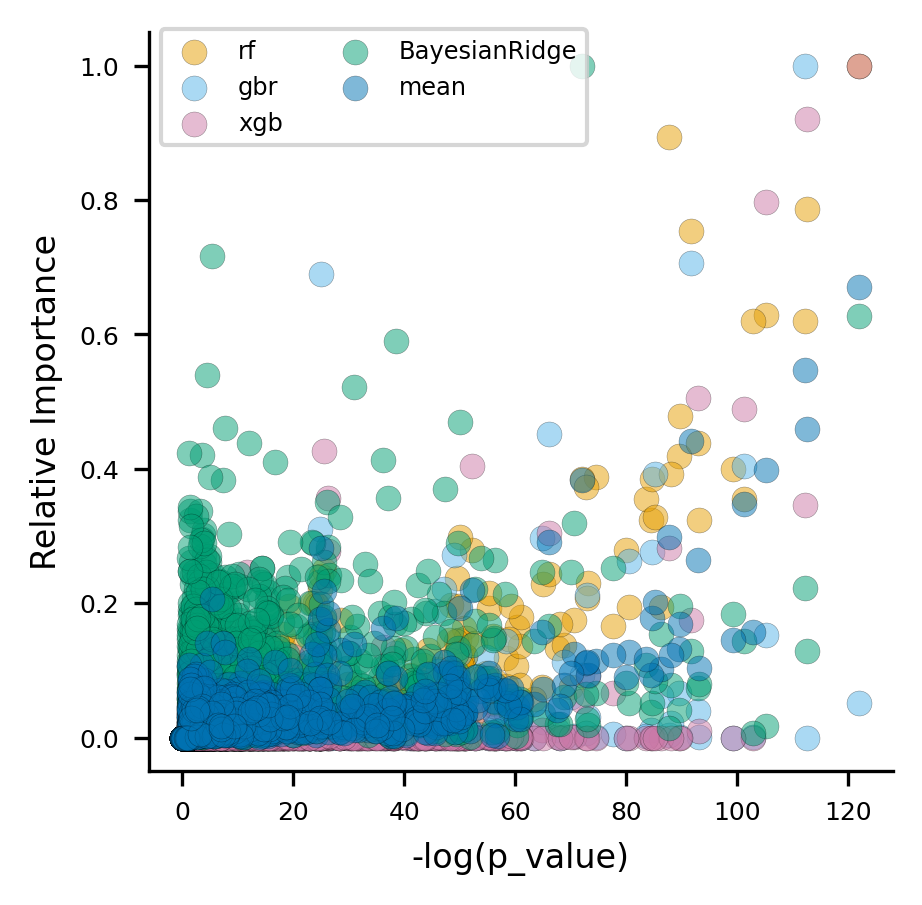

In [34]:
scatter_plot = plot_scatter(summary_result=sr, report_dir=report_dir)

In [35]:
%%time
mean_imp = mean_importance(top, report_dir=report_dir)

CPU times: total: 141 ms
Wall time: 144 ms


mean Done


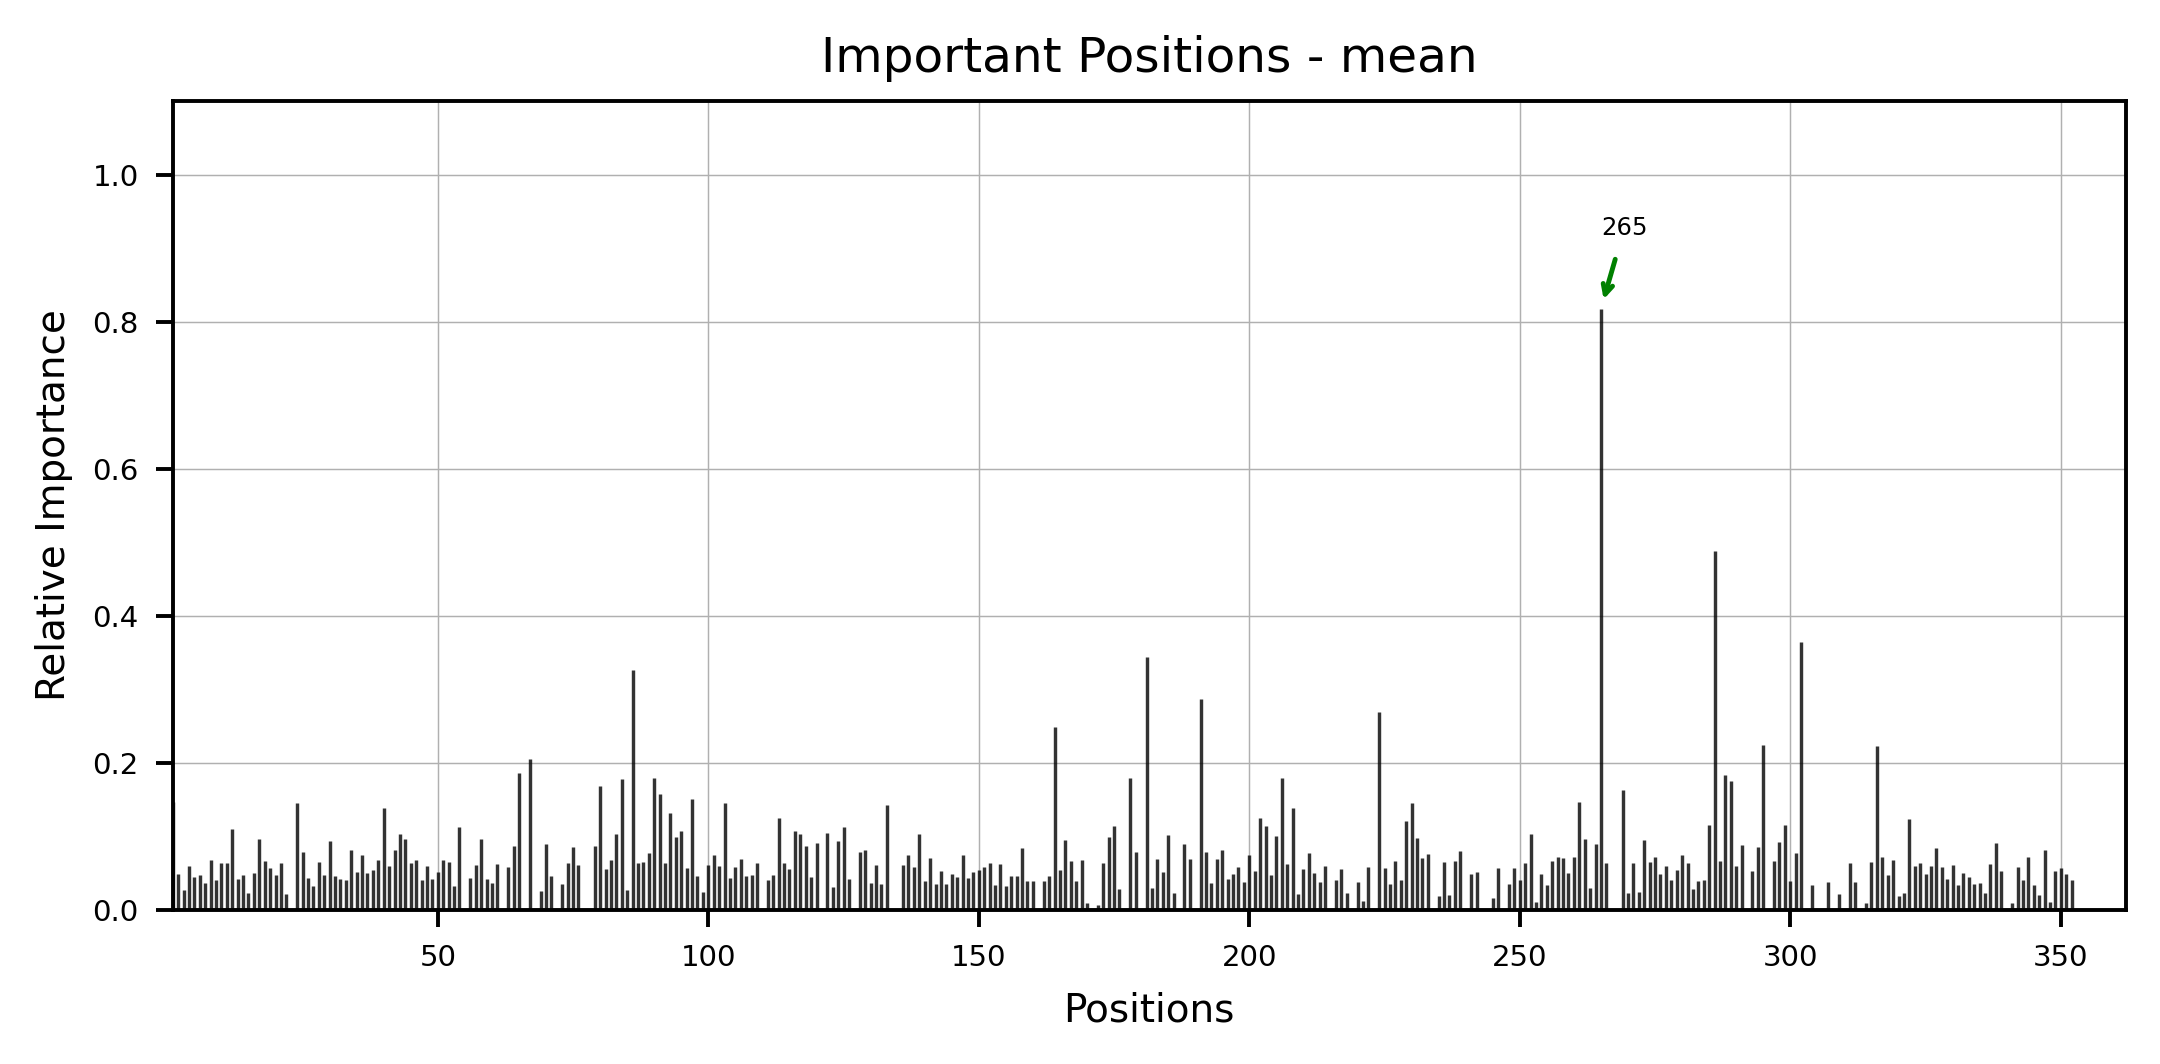

In [36]:
dp_plot(importance=mean_imp,imp_col='mean', model_name='mean', report_dir=report_dir)

In [37]:
test_copy = tr.copy()

In [38]:
test_copy = prep_pipeline[:4].fit_transform(tr)

rf Done
rf  Done
gbr Done
gbr  Done
xgb Done
xgb  Done
BayesianRidge Done
BayesianRidge  Done


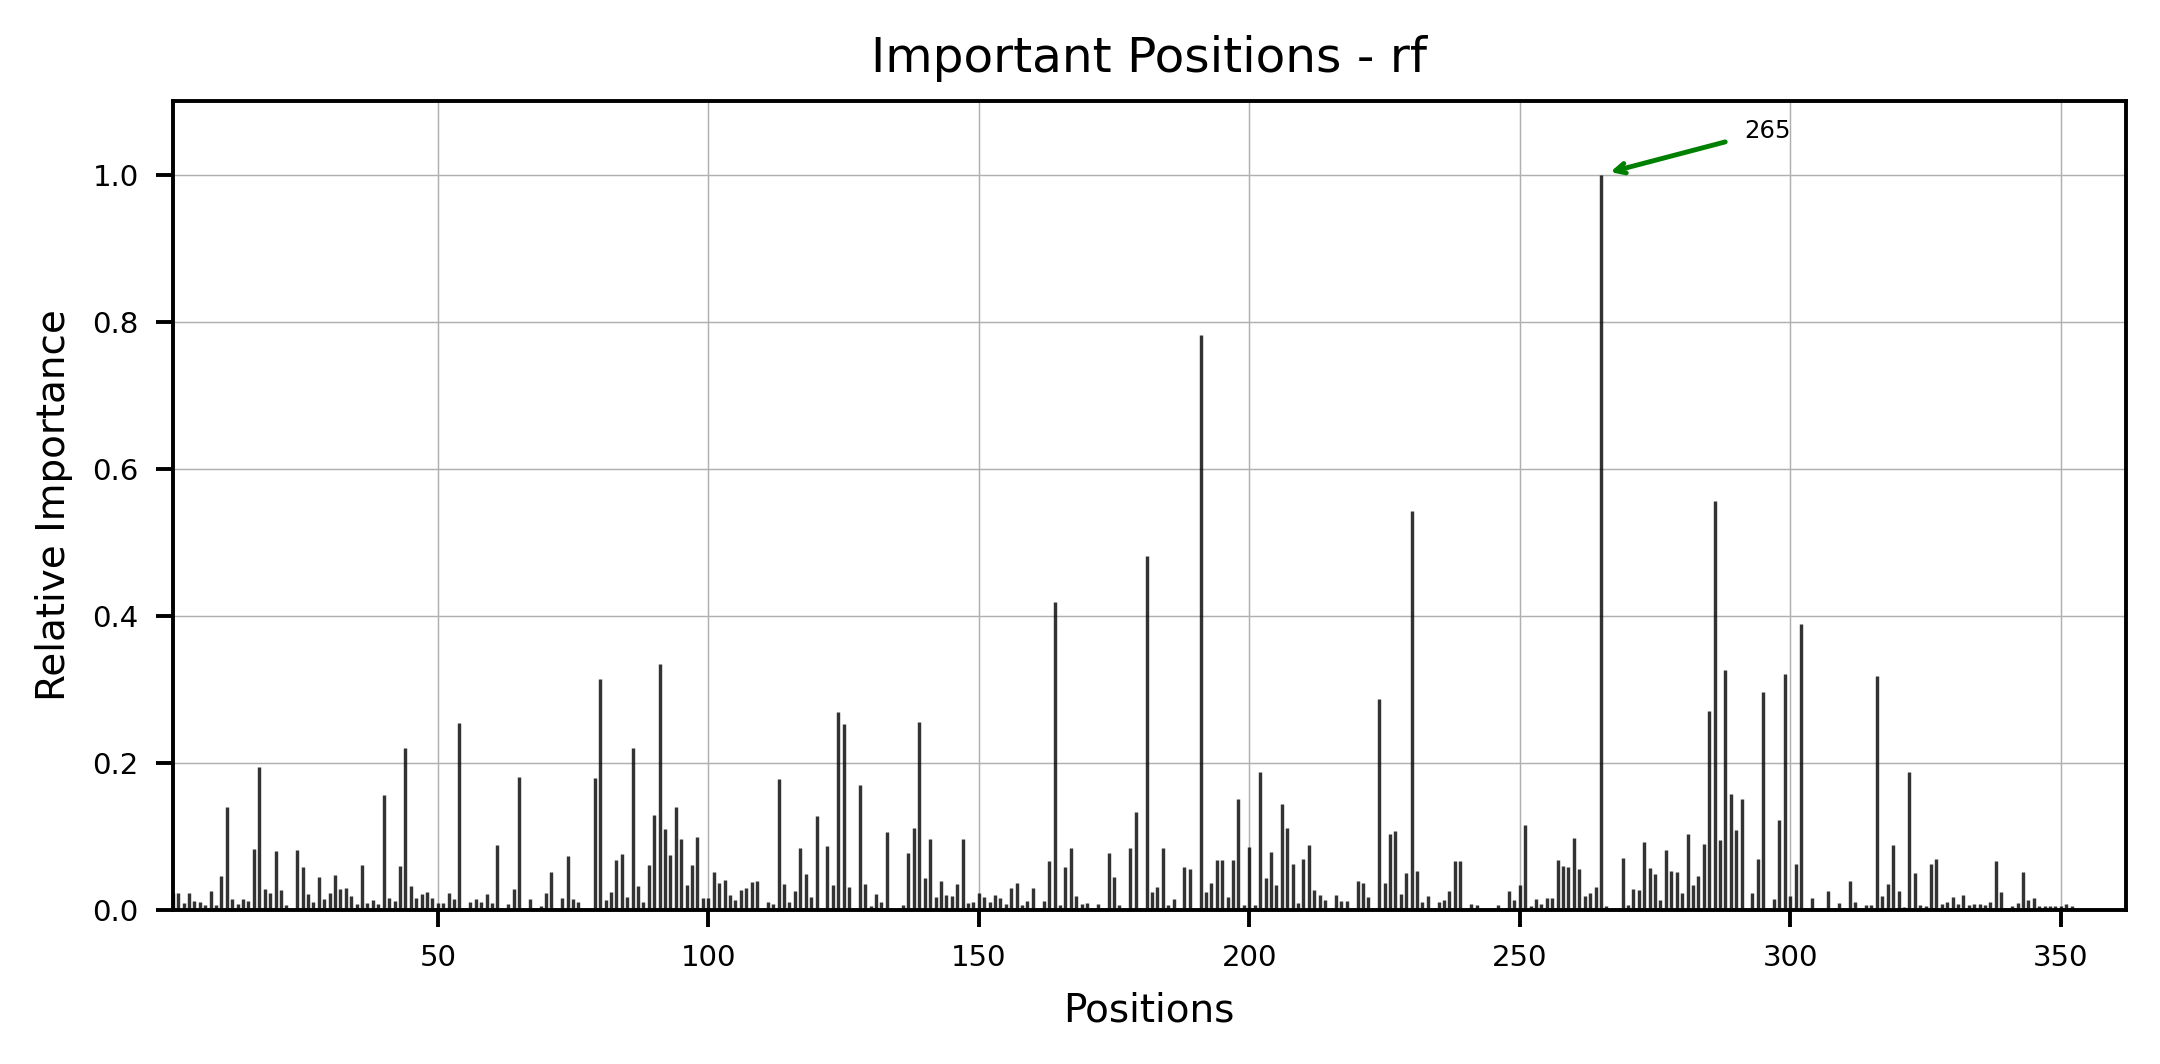

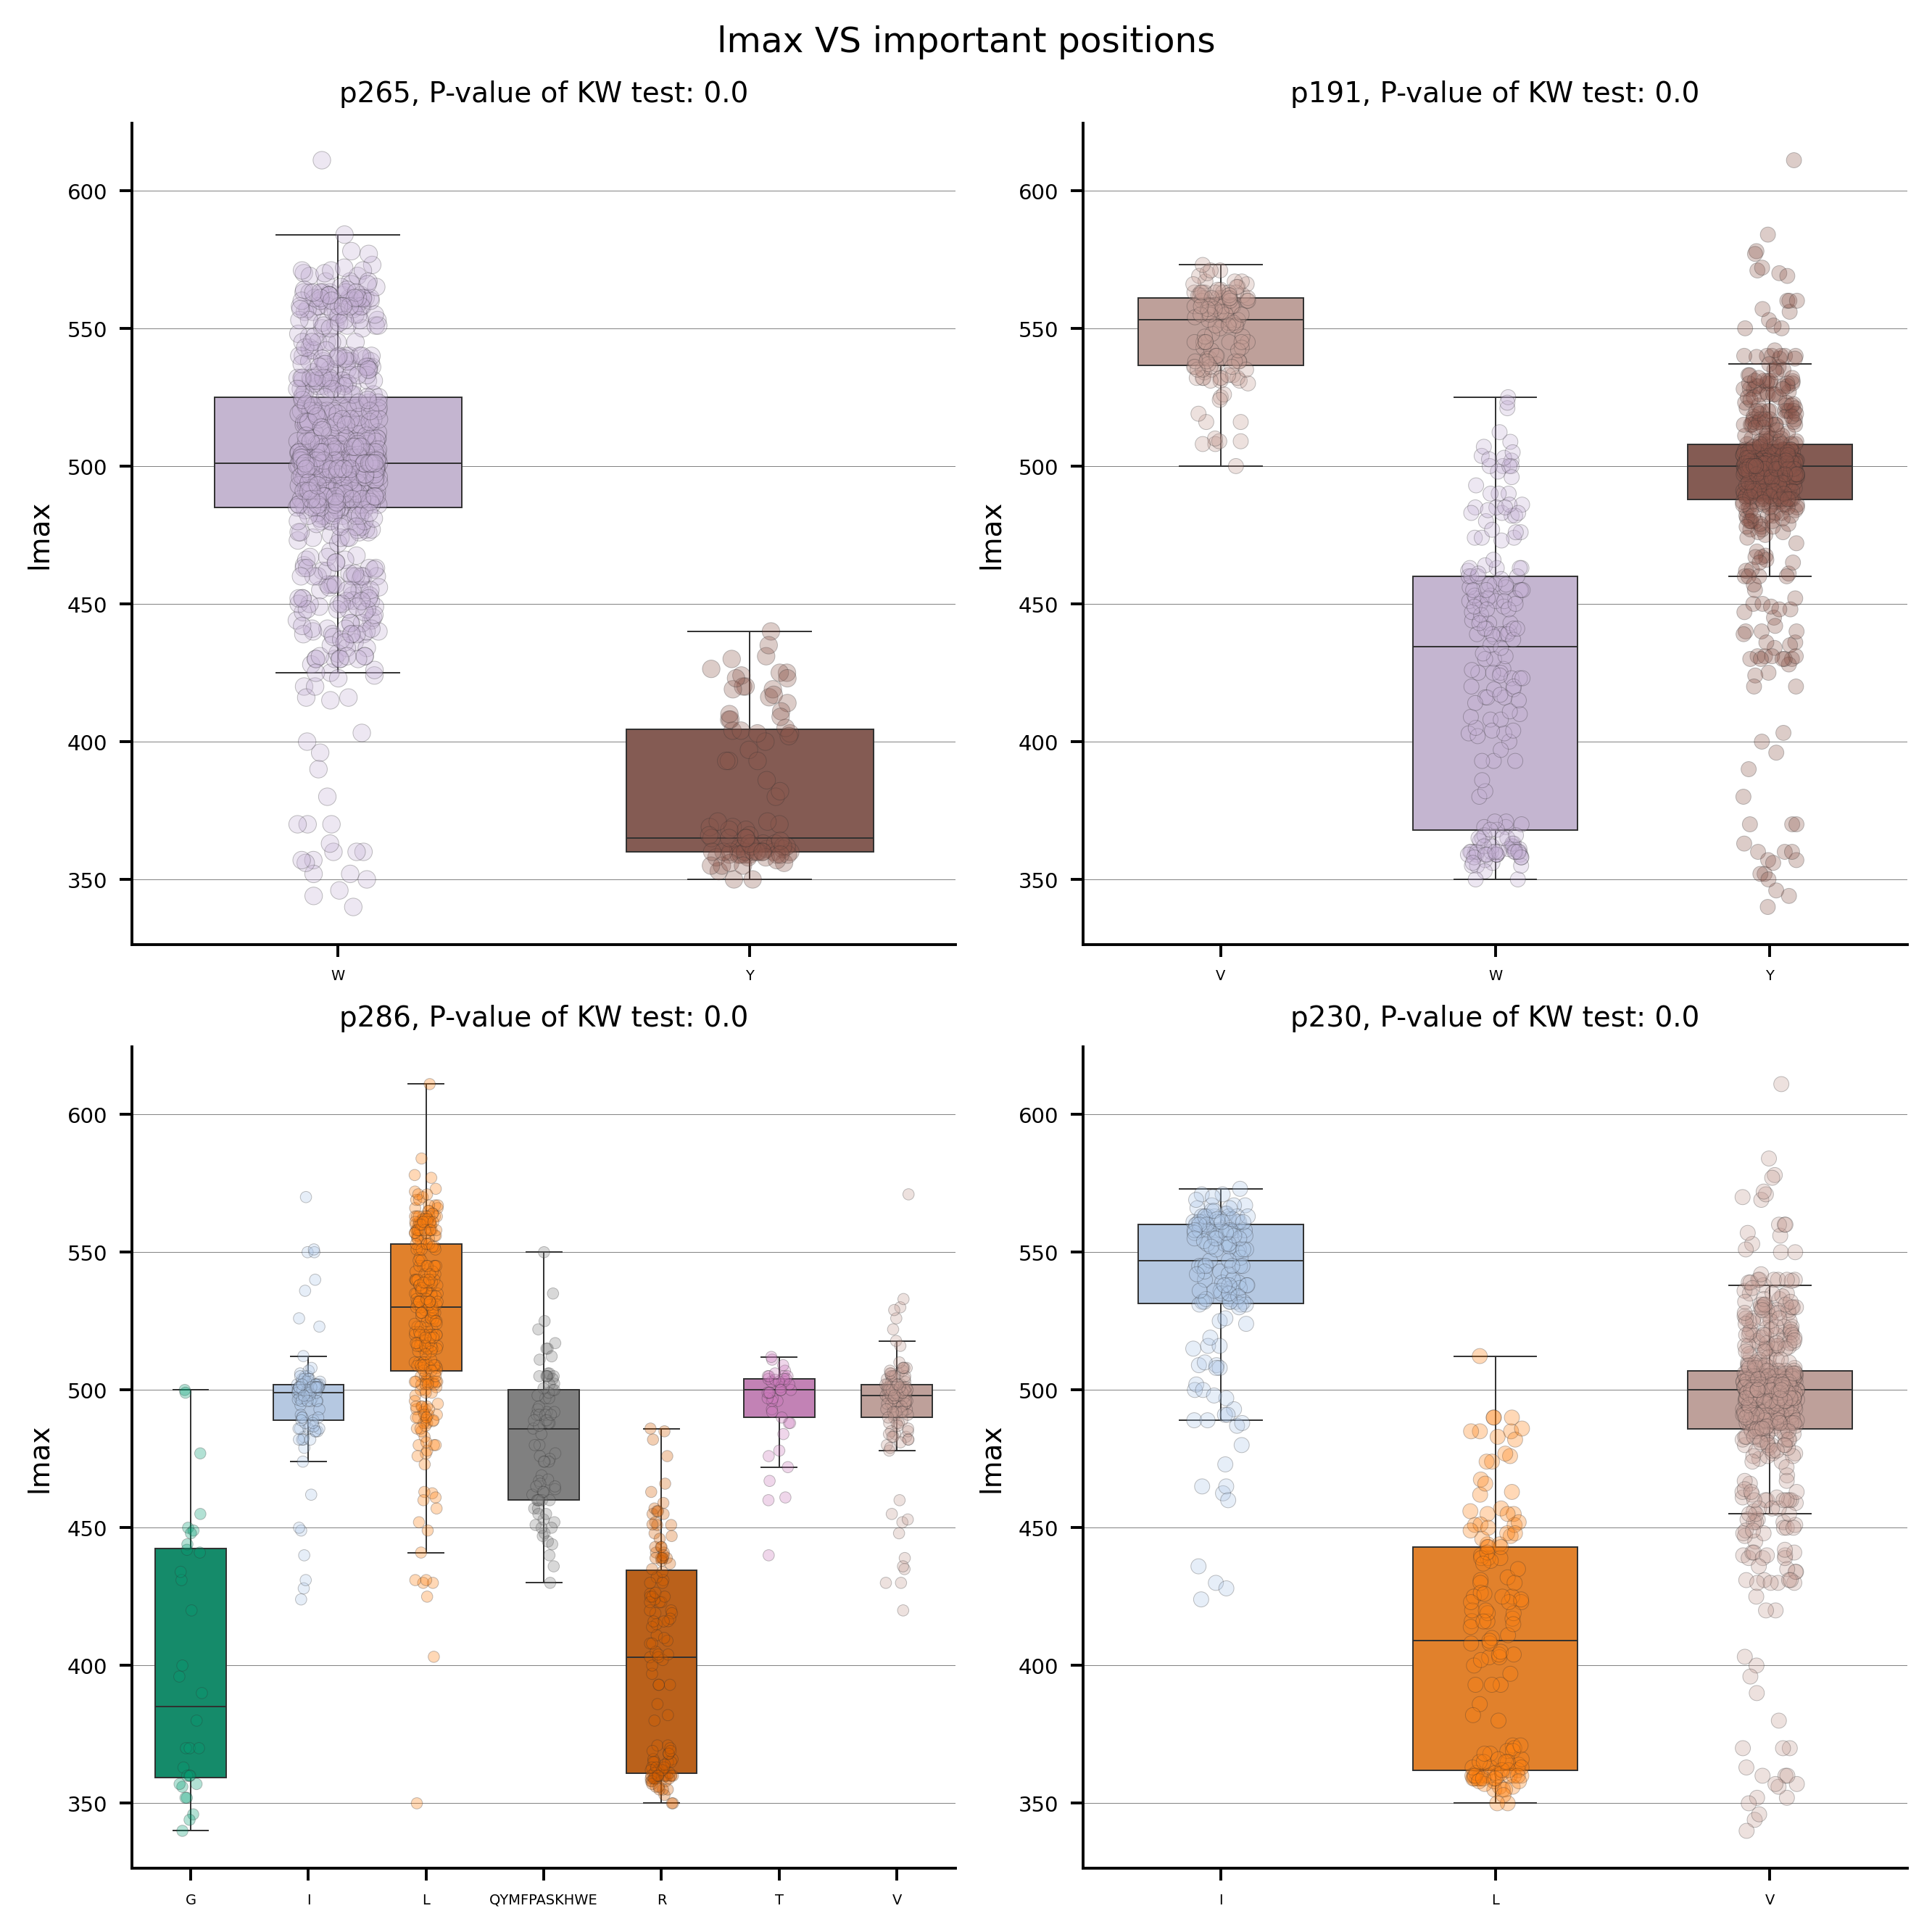

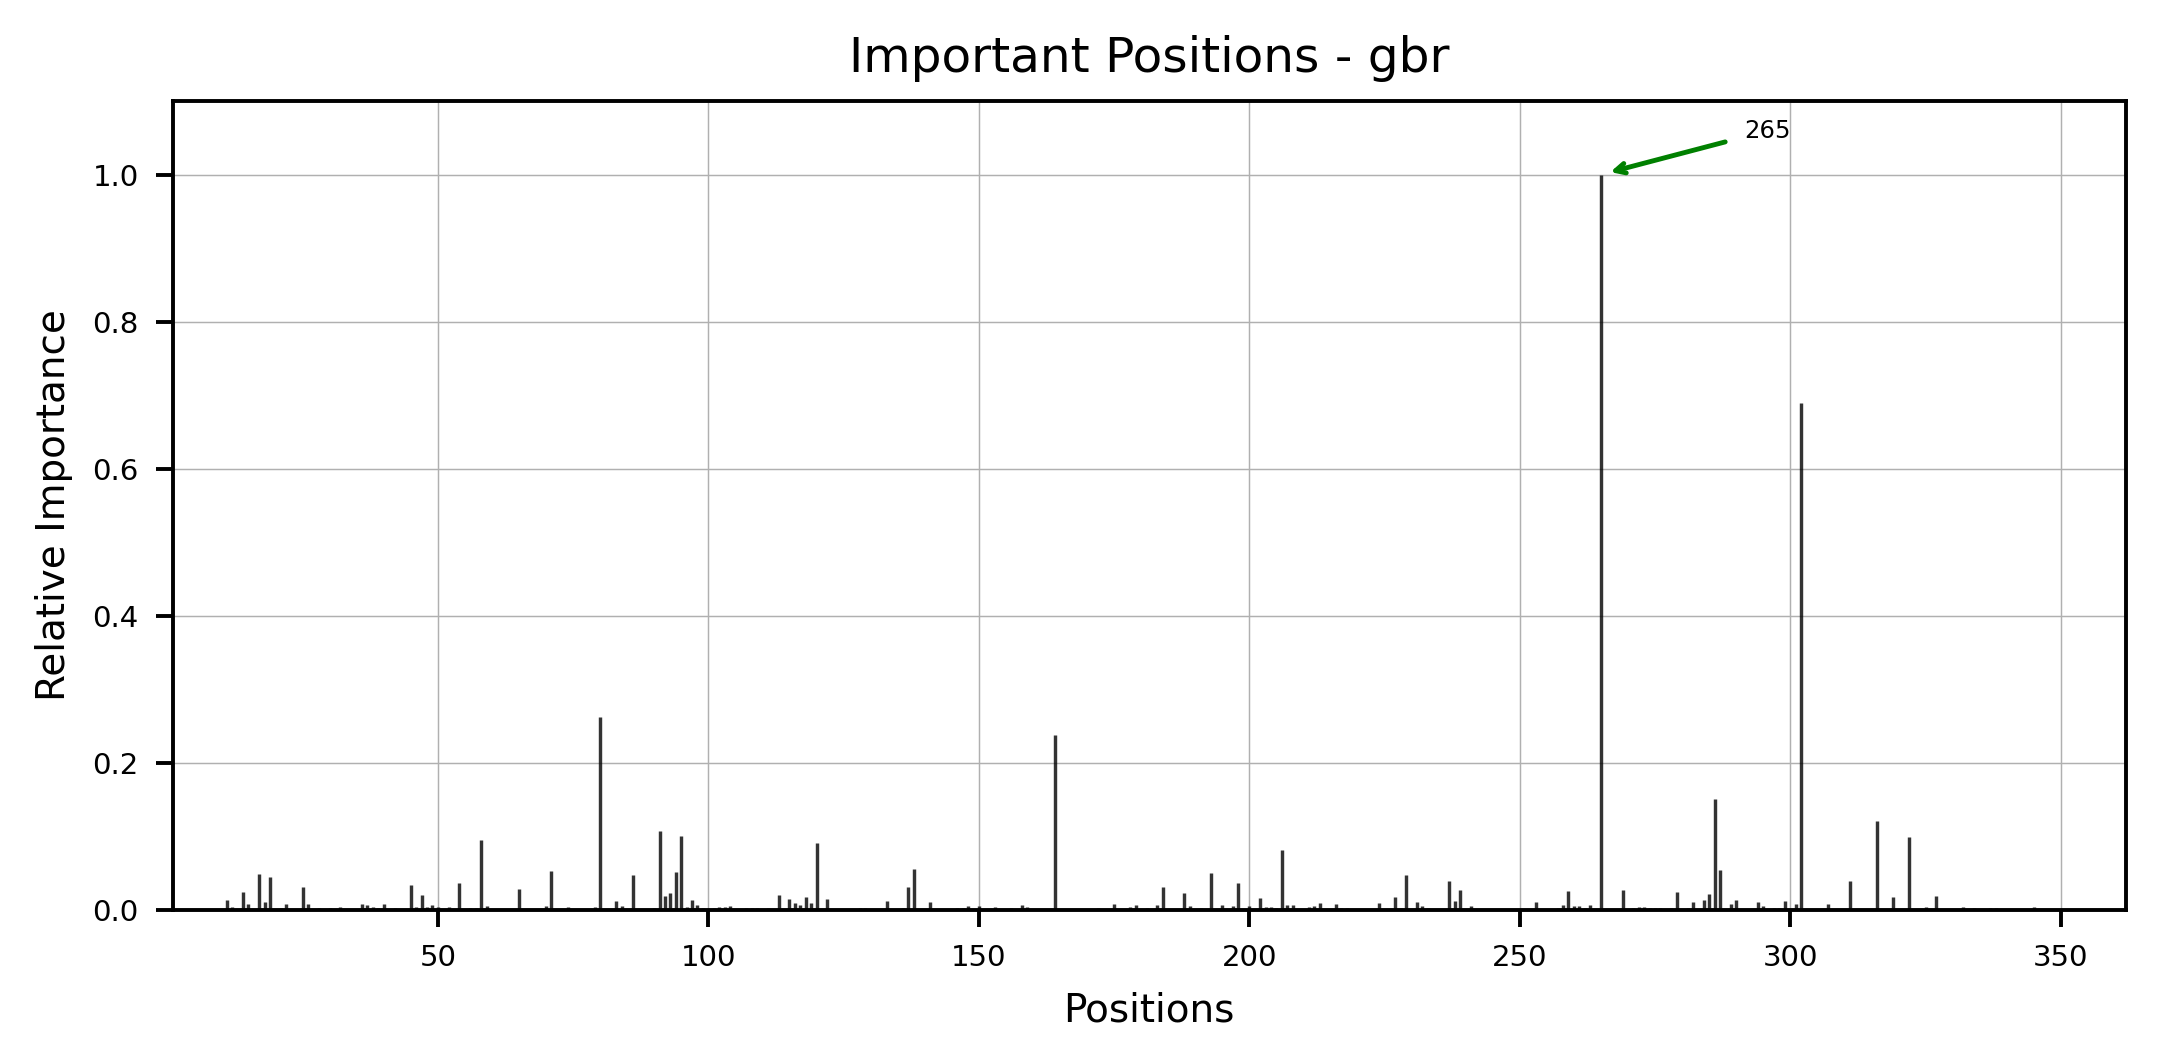

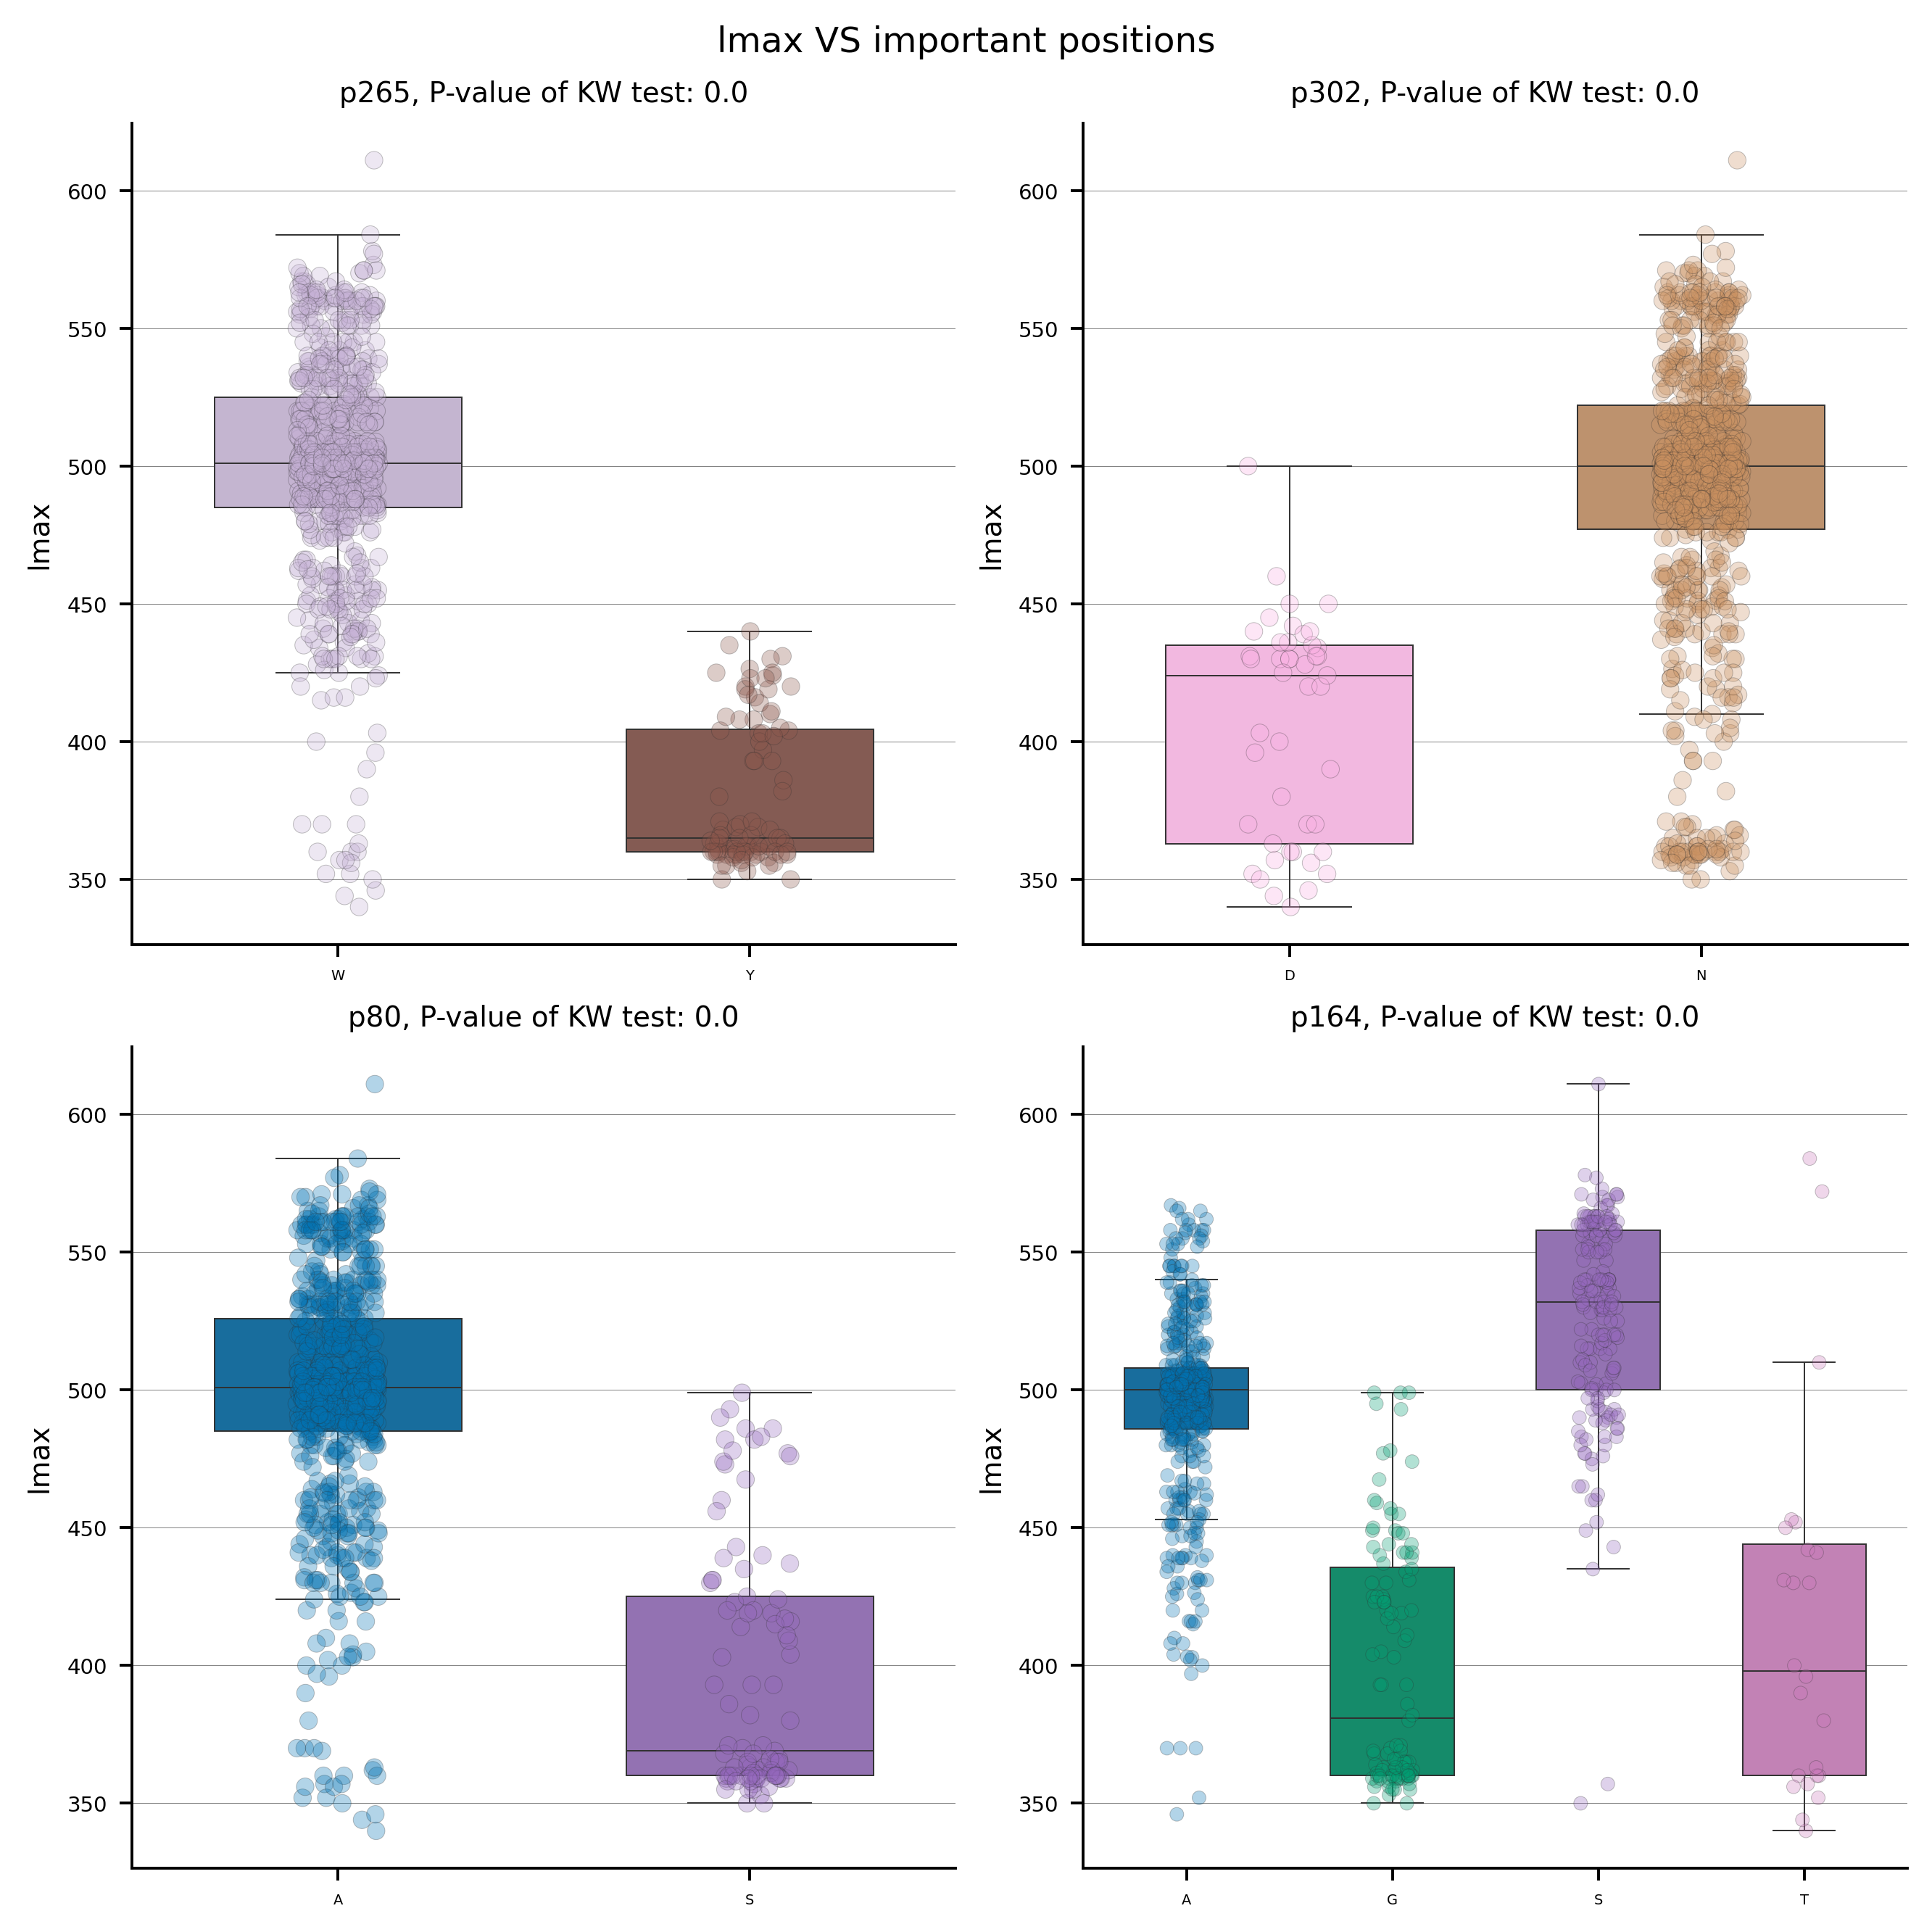

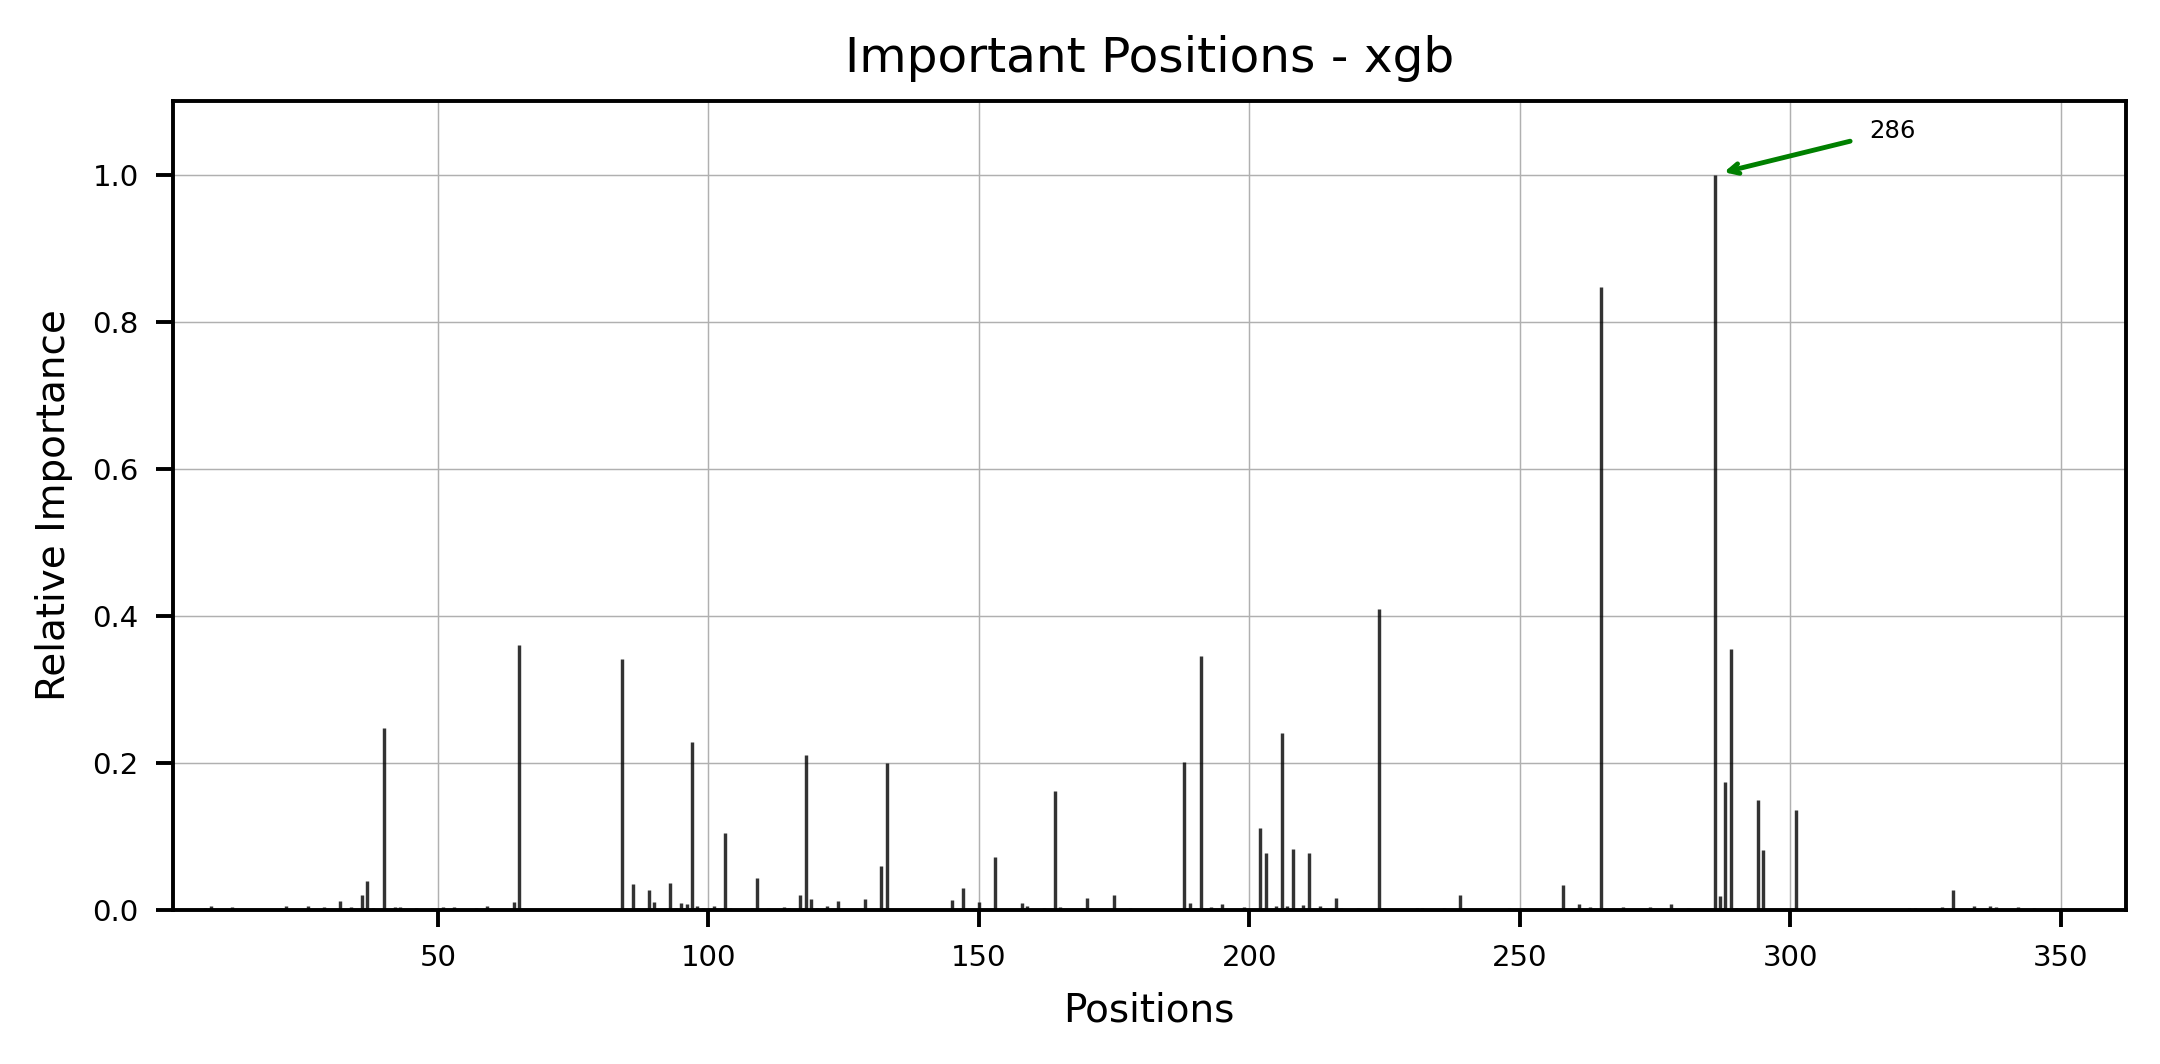

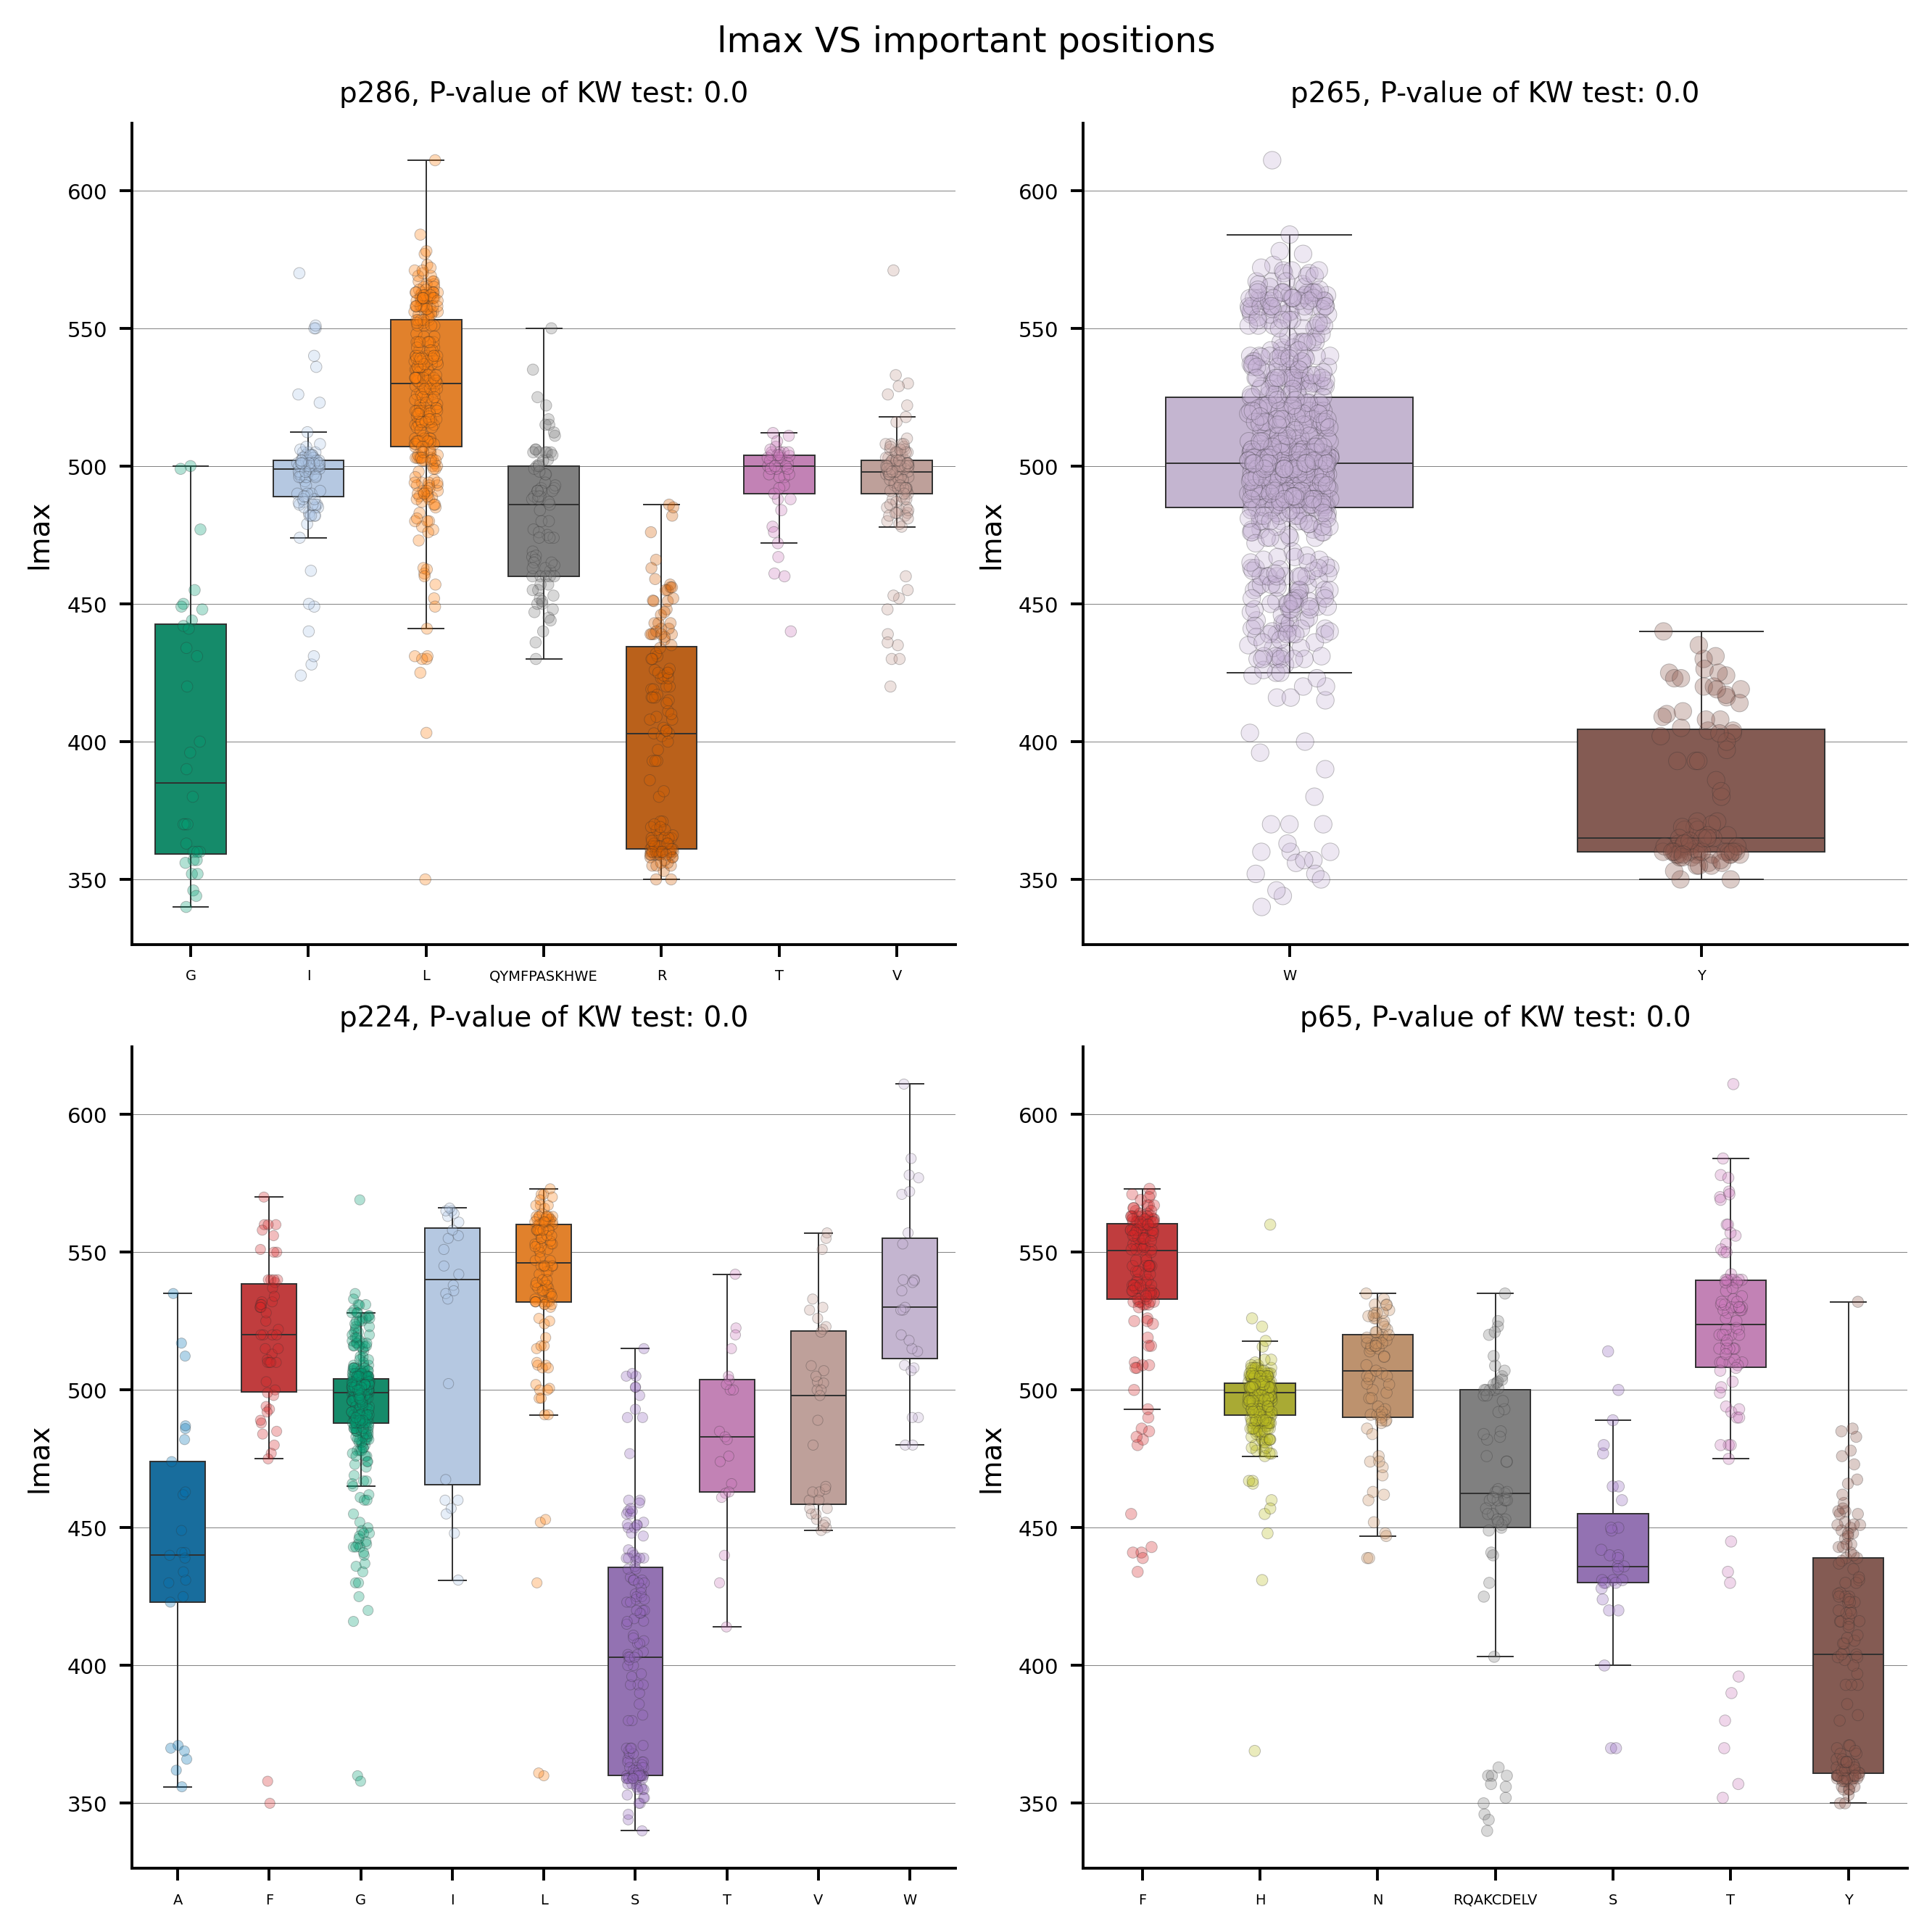

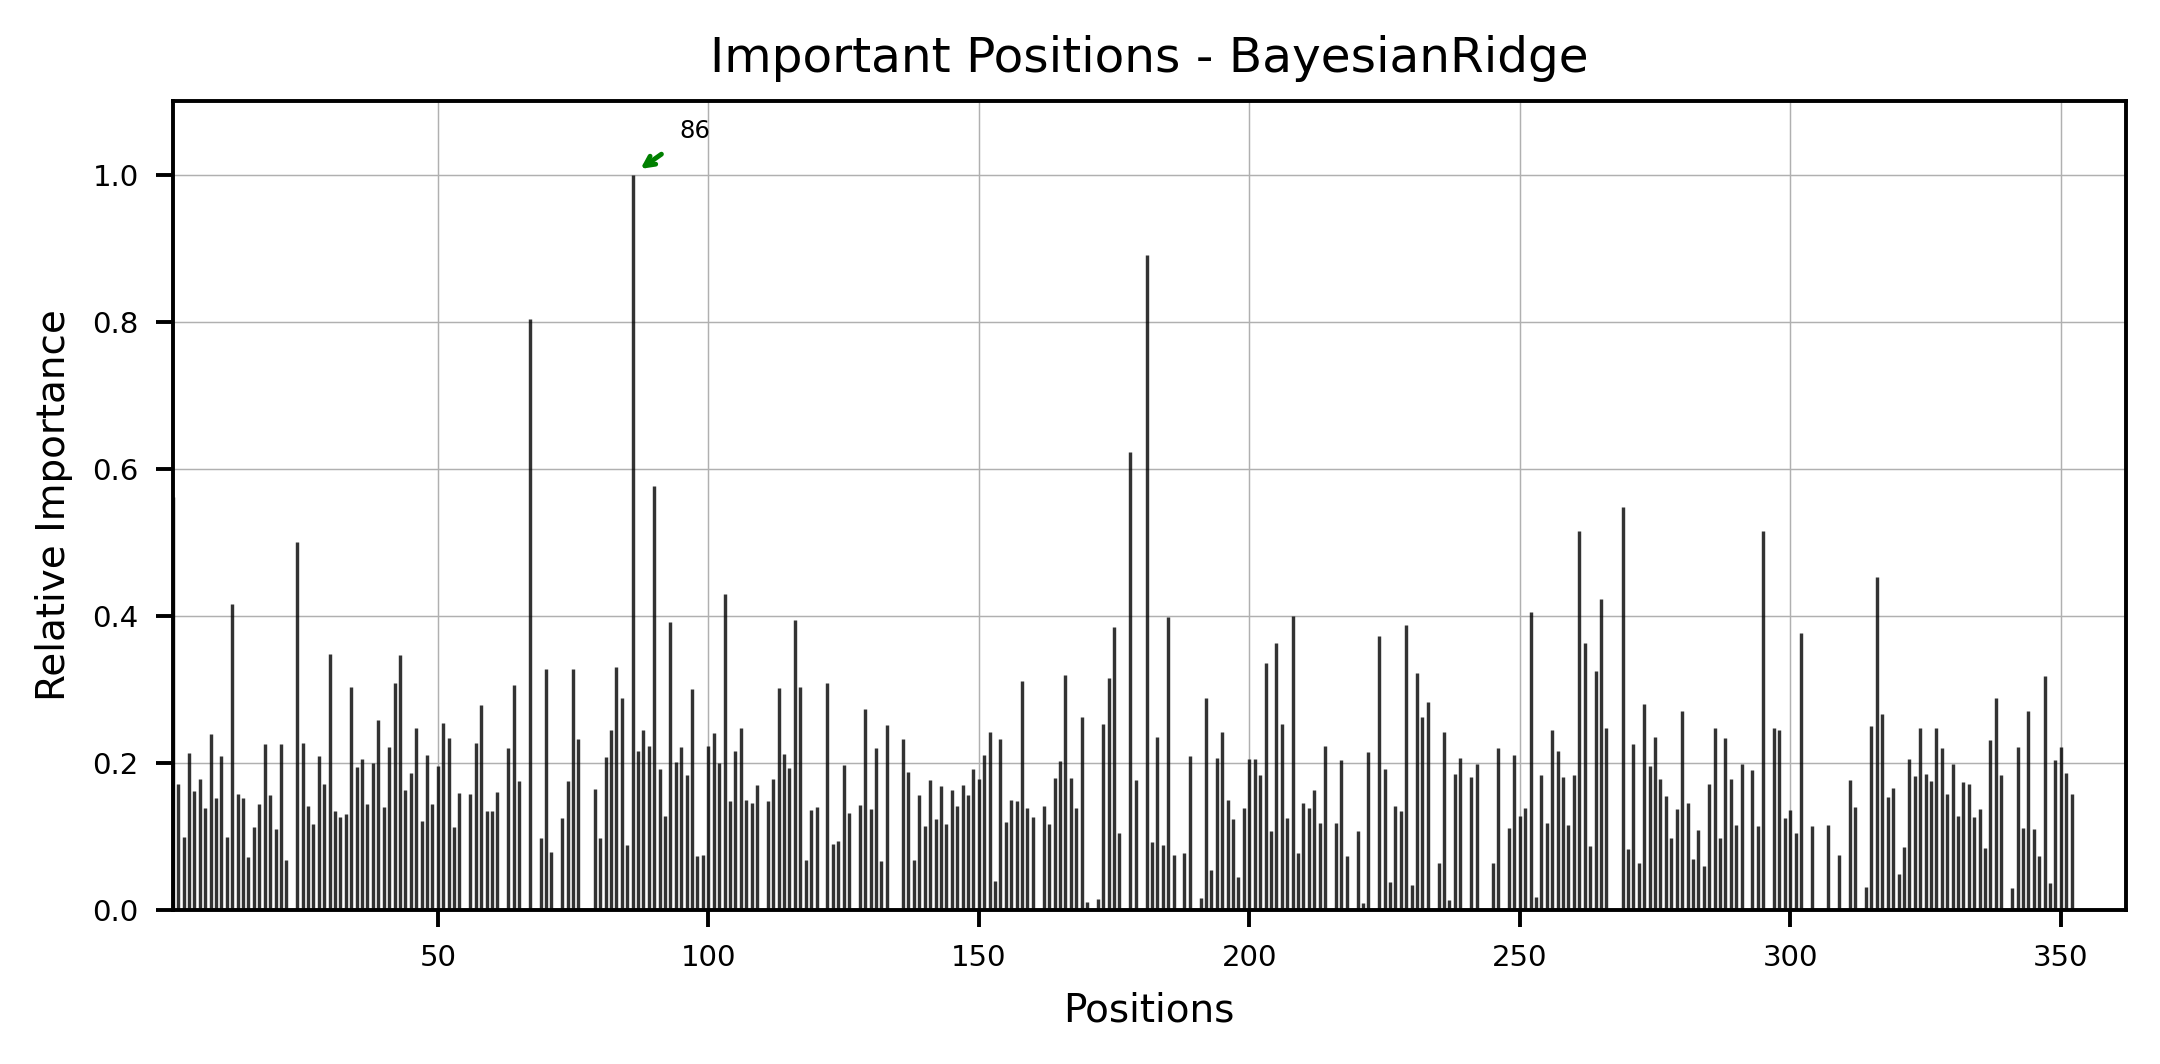

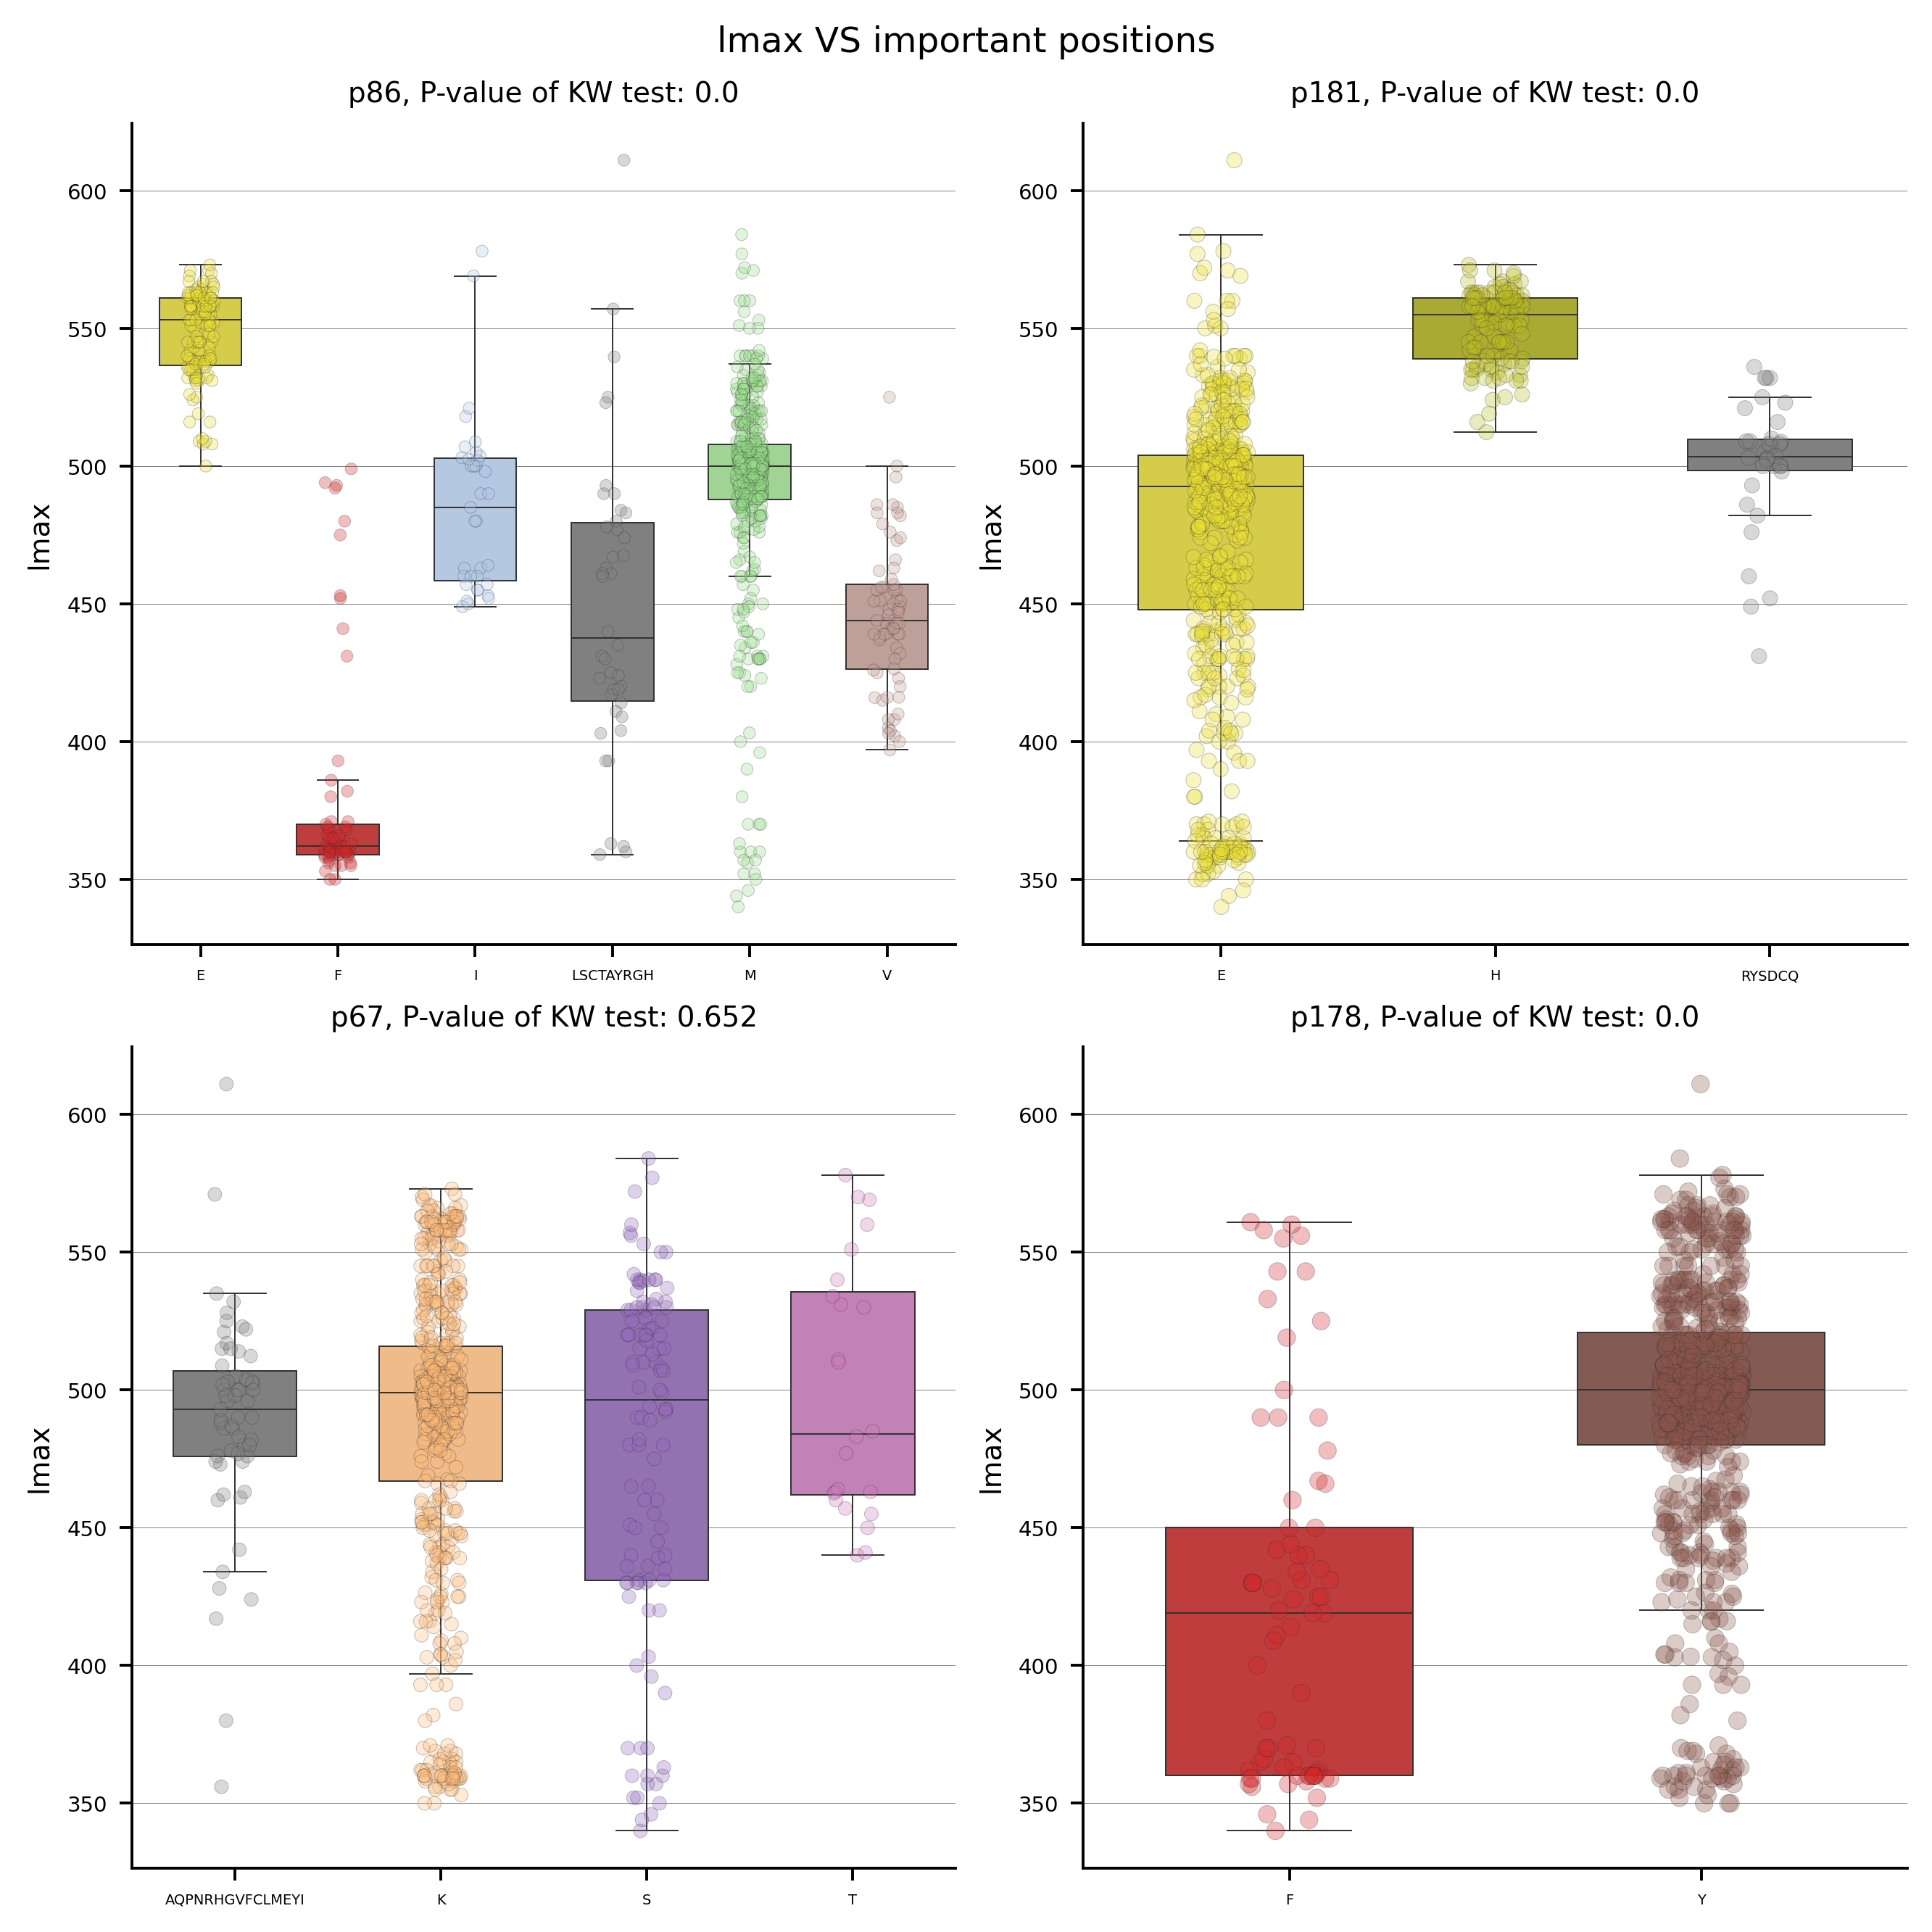

In [39]:
for model in top:
    model_name = model.steps[-1][0]
    dp_plot(importance=importance_from_pipe(model),
            imp_col='standard_value',
            model_name = model_name, report_dir=report_dir)
    
    plot_imp_model(importance=importance_from_pipe(model), 
               X_train=test_copy, y_train=y, model_name=model_name,
                   meta_var='lmax', model_type=ana_type, report_dir=report_dir)

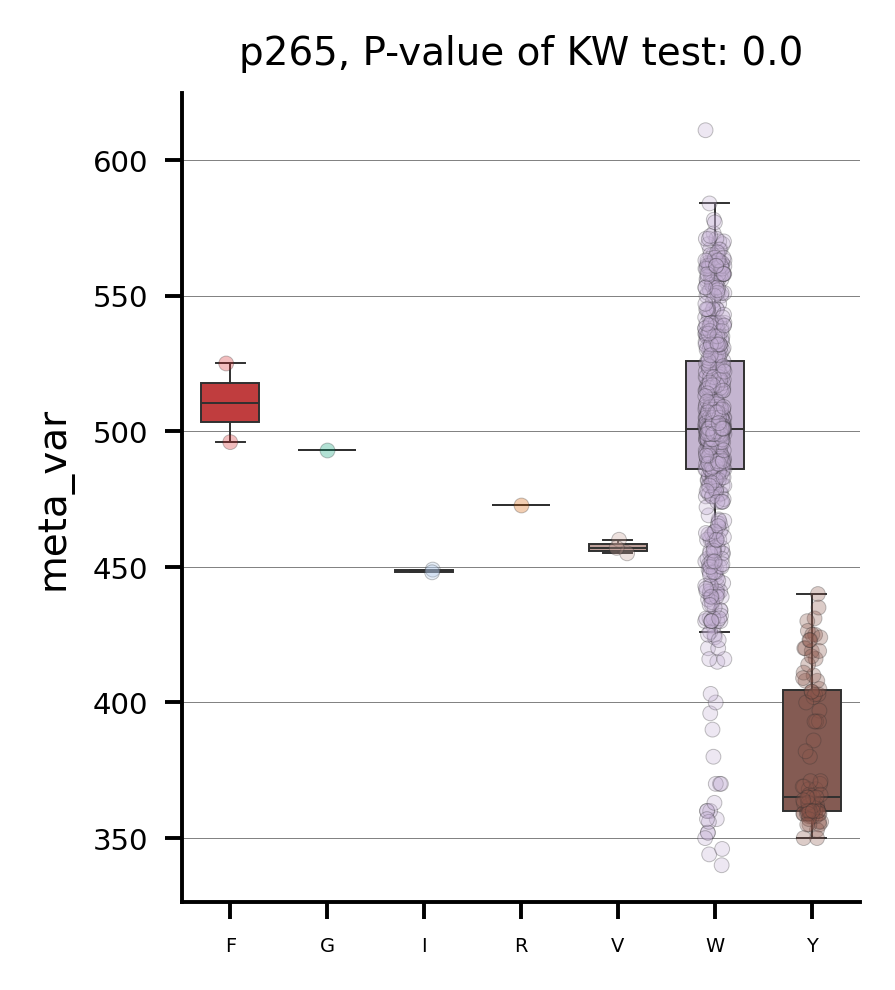

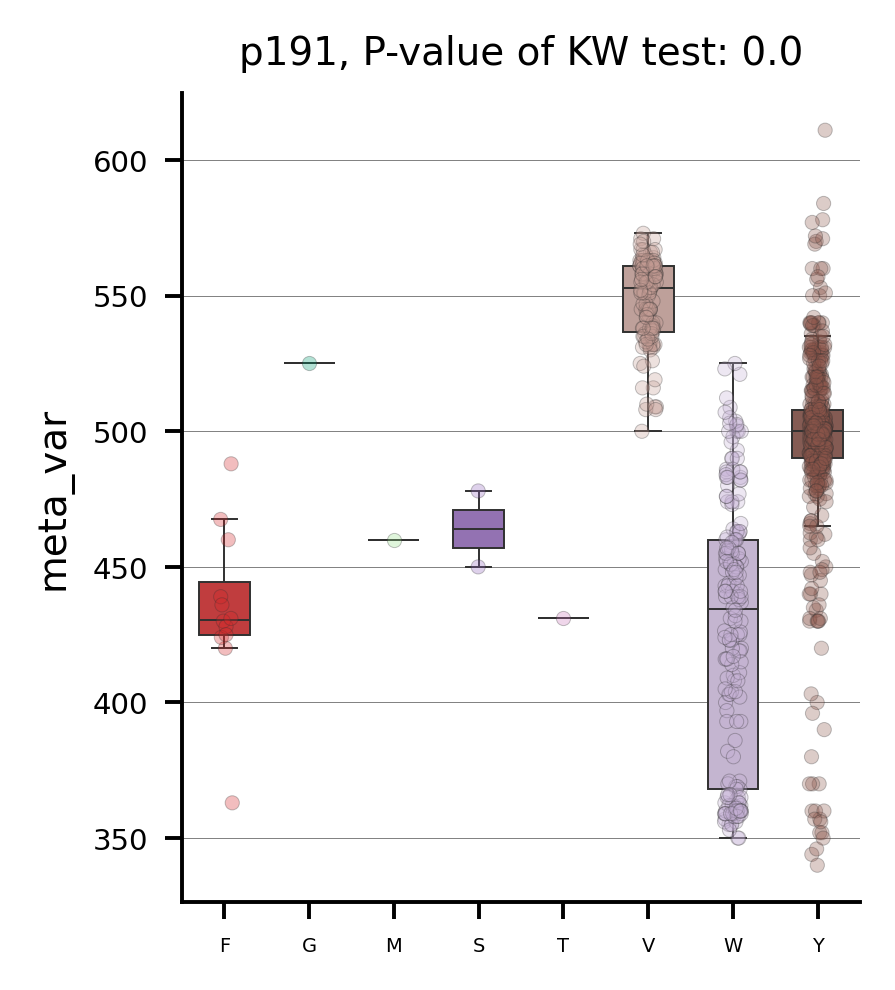

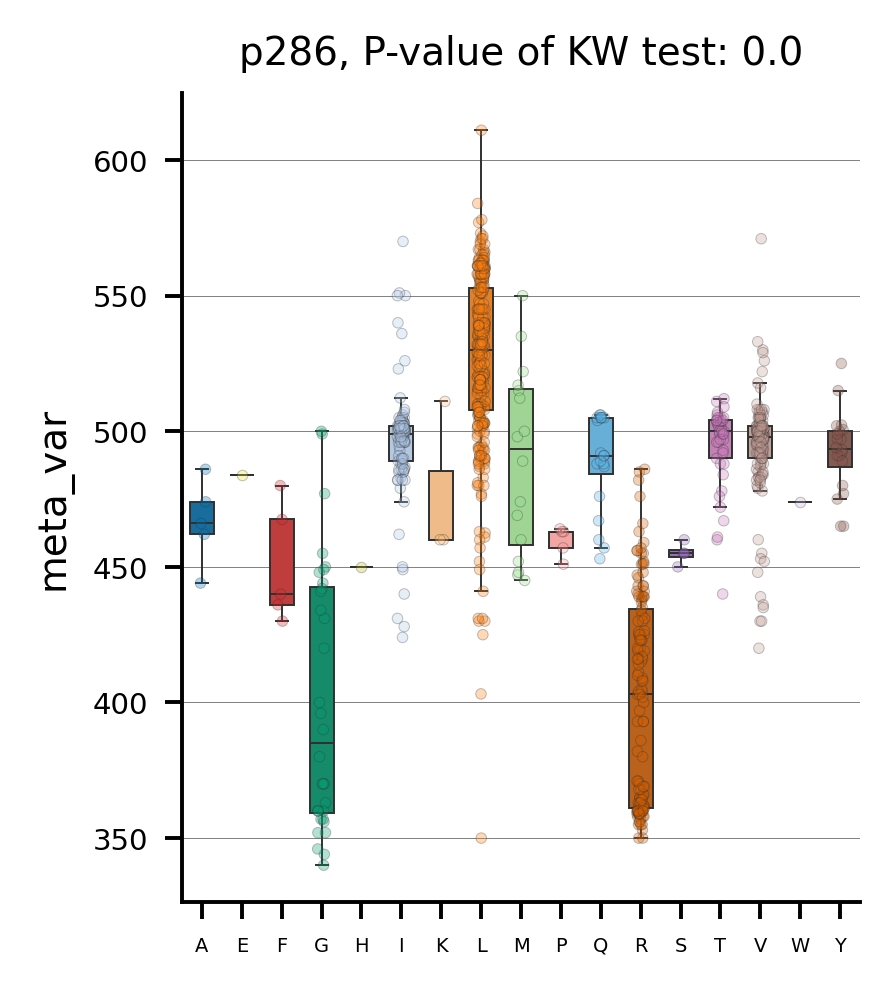

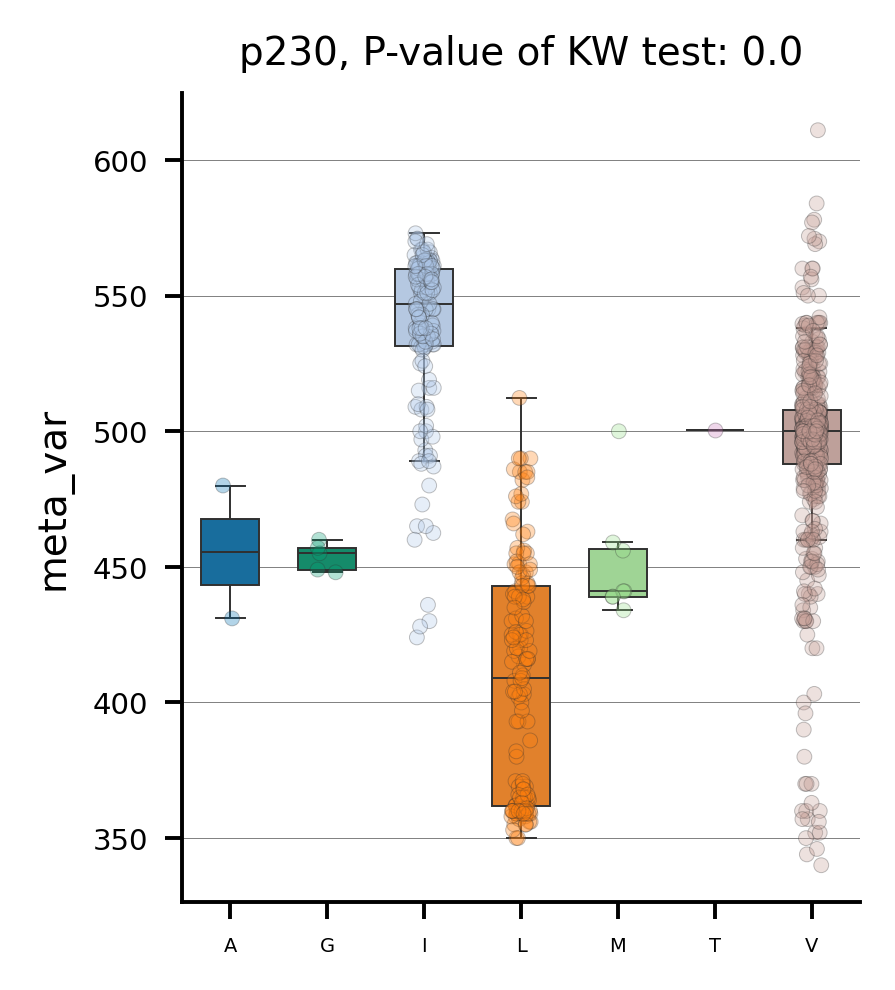

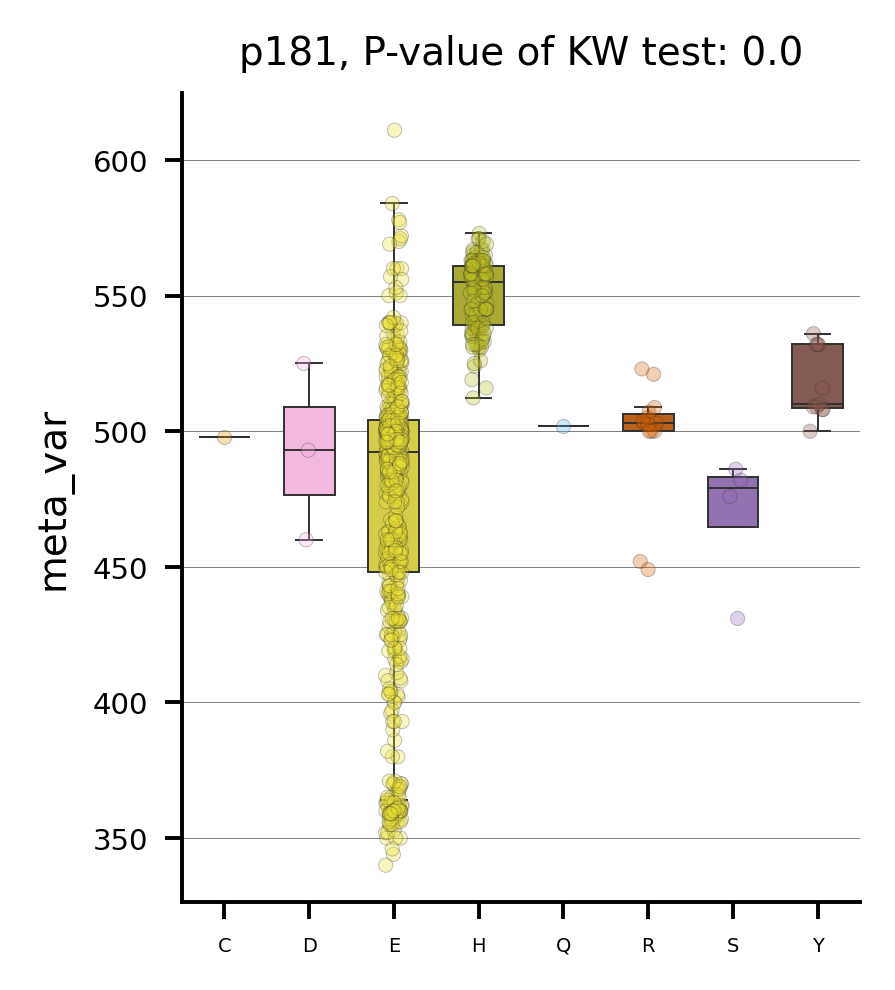

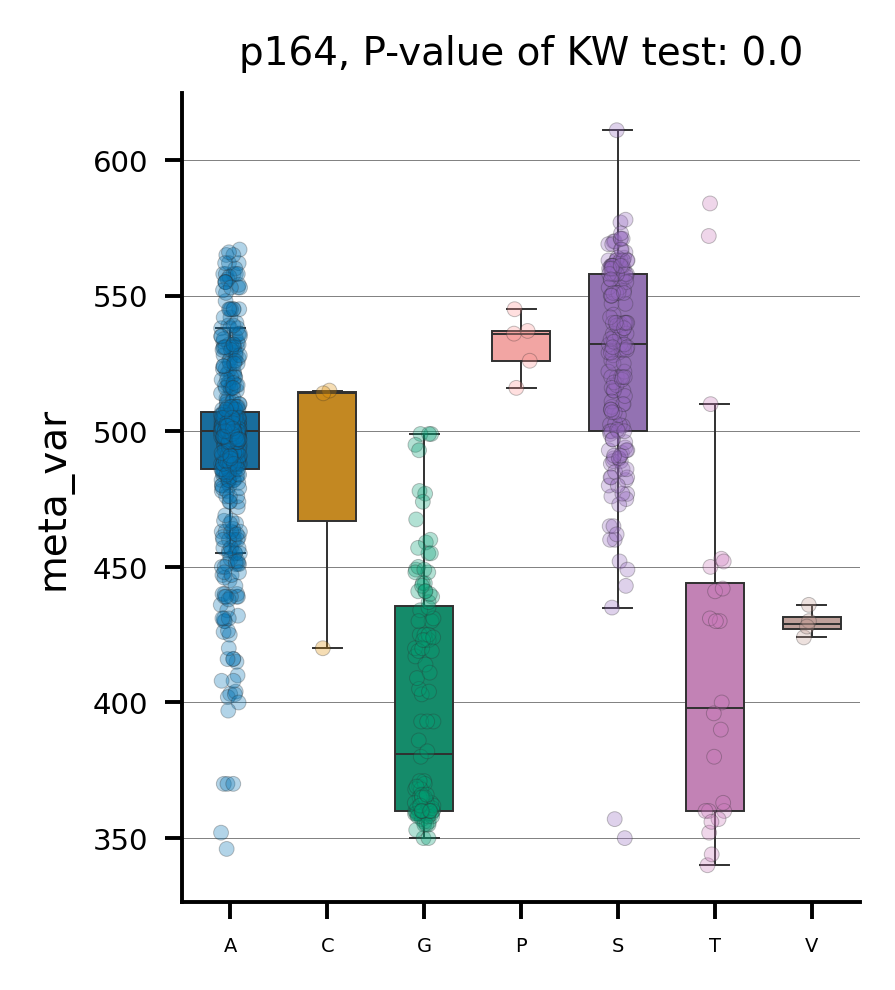

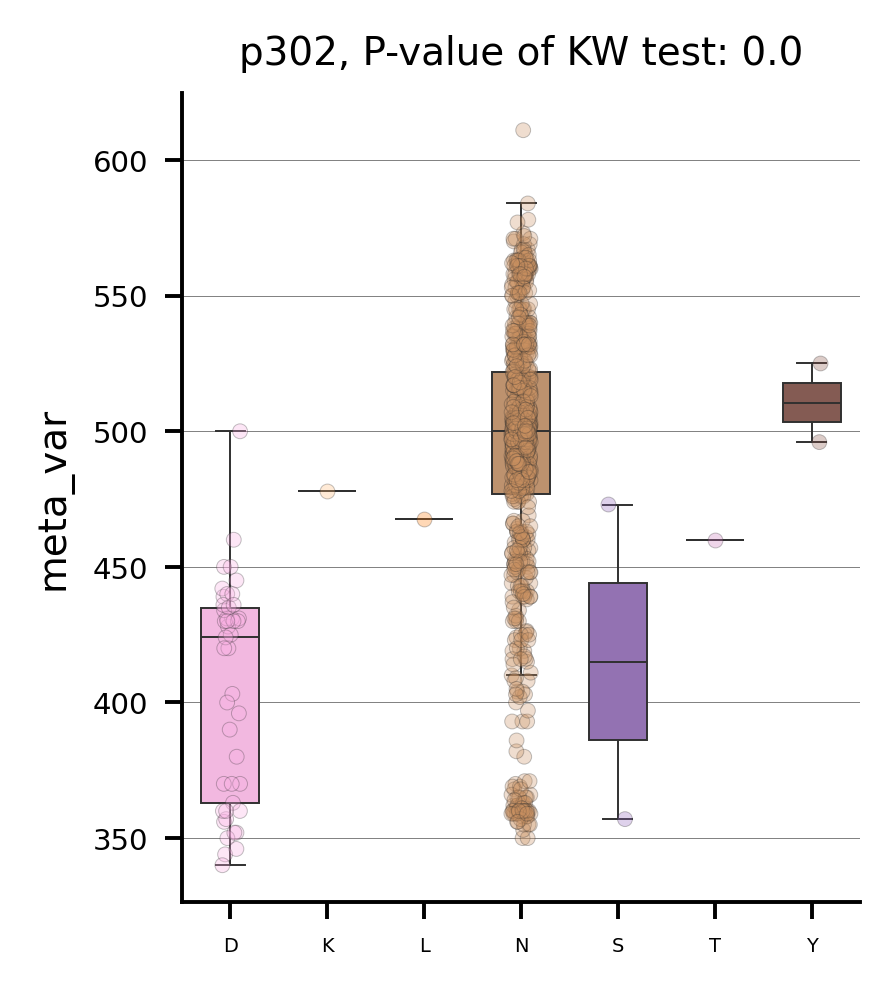

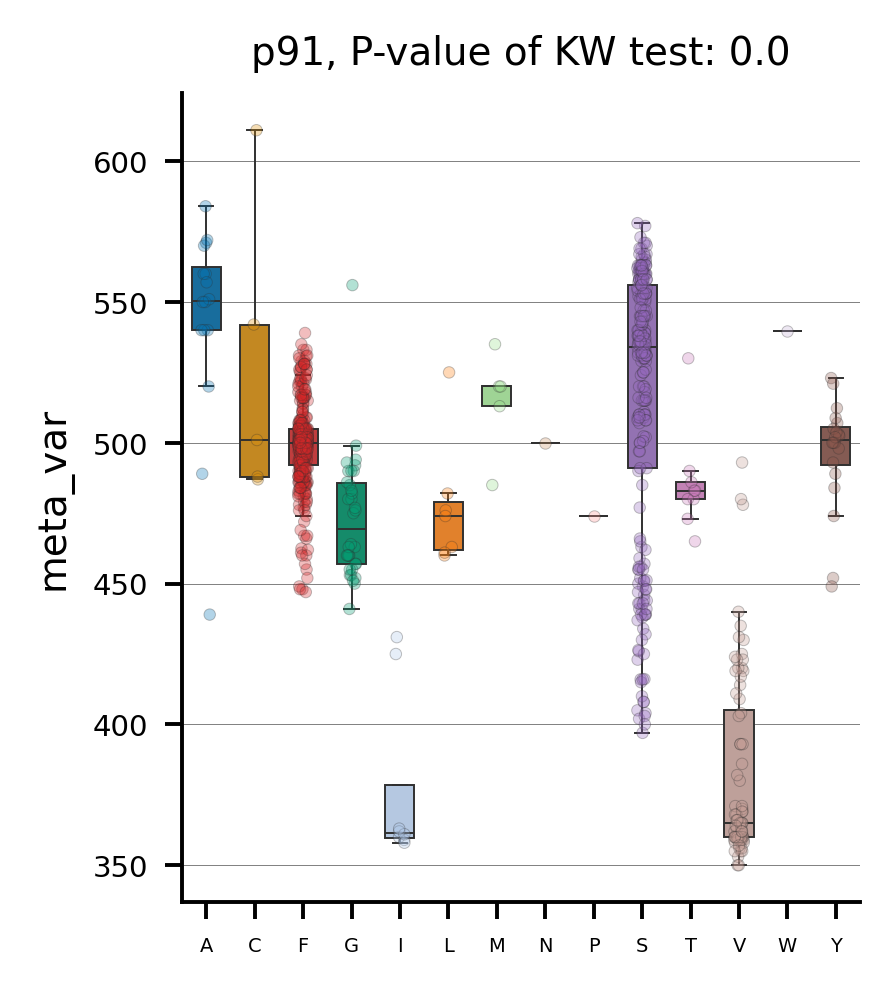

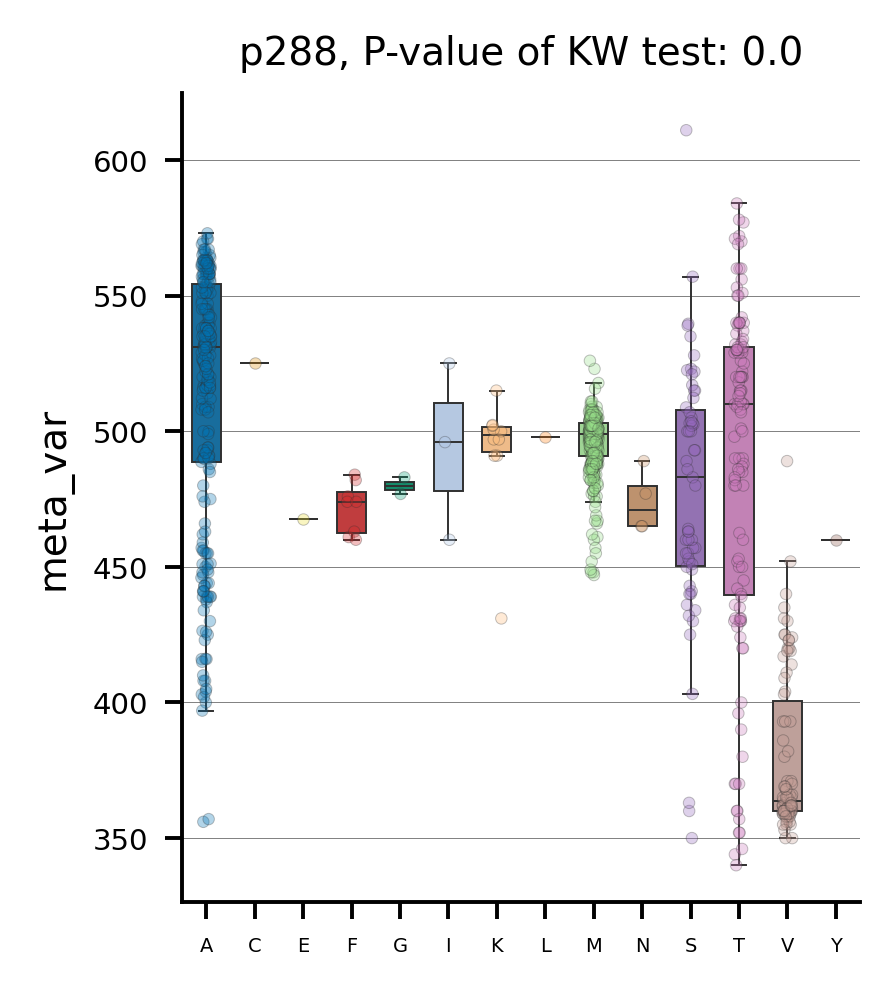

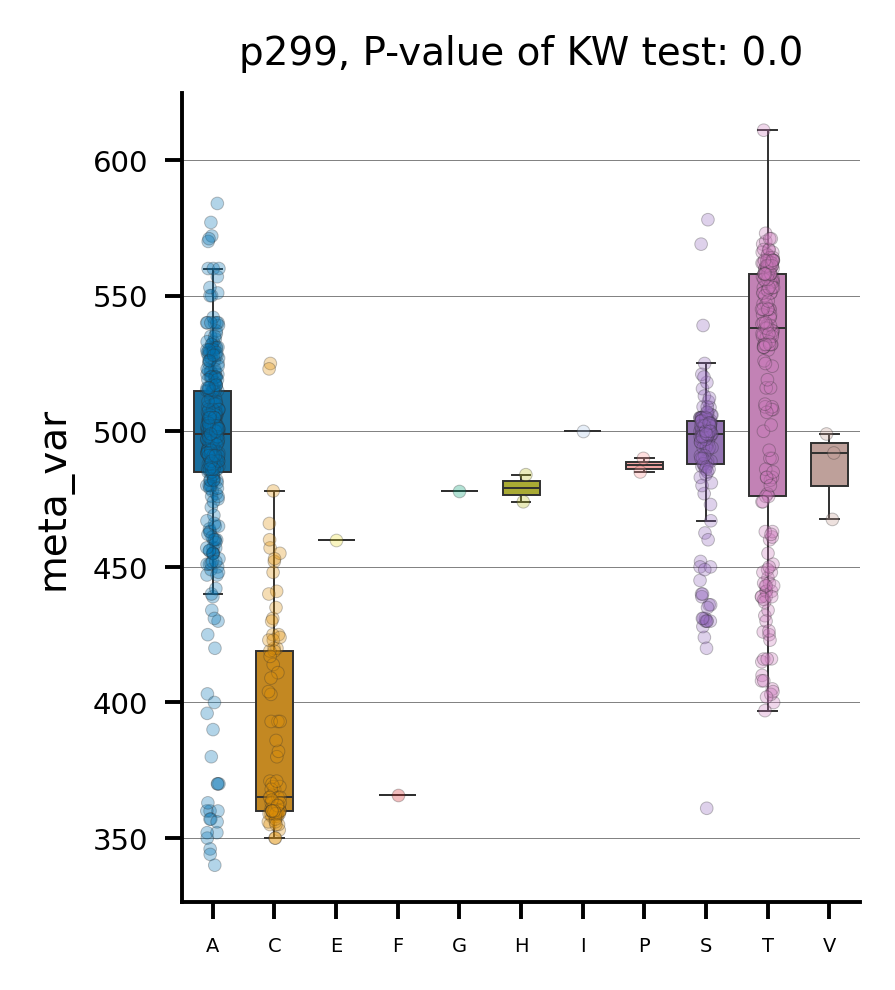

In [40]:
pl = plot_imp_all(final_models=top,
                  X_train=tr, y_train=y,
                  model_type = ana_type,
                  report_dir=report_dir, max_plots=10,
                  figsize=(2.5, 3))

In [41]:
from deepBreaks.utils import load_obj
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [42]:
top_per_mod = report_dir + '/' + mtml[2] + '.pkl'
load_top_mod = load_obj(top_per_mod)

In [43]:
print(f'Here is a list of your top performing models to test...\n{mtml}')

Here is a list of your top performing models to test...
['rf', 'gbr', 'xgb', 'BayesianRidge']


# <font color=red>STEP 4: Translate Candidate STSs</font> 
## This section is used to translate candidate STSs to the bovine or squid equivalent.
### The bovine and squid sequence dataframes that were saved earlier and are called again here


In [44]:
import pandas as pd
import os

In [45]:
#STEP 4: Translate Candidate STSs 
#translate candidate STSs to the bovine or squid equivalent 
#bovine and squid sequence dataframes were saved earlier and are called again here
m = 0
tm = ''
k=0
gaps=0
#import importance_report.csv from report_dir
true_pos = []
aa = []
tmd = []
df = pd.read_csv(f'{report_dir}\importance_report.csv')
#take the list of important sites and translate them to the bovine standard equivalent, 
#we do this by taking the site number and subtracting the number of '-' between the start of the sequence and the desired site. 
for rows in reference_seq.values:  
    rows = str(rows)
    #print(rows)
    if rows == 'nan':
    #We want to write the 'true_pos', 'aa', and 'TMD' to the 'importance_report' csv file
        gaps += 1
        k += 1
        true_pos.append('NA')
        aa.append('-')
        tmd.append('NA')
    else:
        #print("The number of gaps is " + str(gaps))
        k+=1
        trans_site = k - gaps
        if ref_seq_name == 'bovine':
            if trans_site in range(3,37):
                tm = 'N-Termina'
            elif trans_site in range(37,62):
                tm = '1'
            elif trans_site in range(74,96):
                tm = '2'
            elif trans_site in range(111,133):
                tm = '3'
            elif trans_site in range(153,174):
                tm = '4'
            elif trans_site in range(203,225):
                tm = '5'
            elif trans_site in range(253,275):
                tm = '6'
            elif trans_site in range(287,309):
                tm = '7'
            else:
                tm = 'CT/EC'
        else:
            if trans_site in range(3,34):
                tm = 'N-Termina'
            elif trans_site in range(34,59):
                tm = '1'
            elif trans_site in range(71,97):
                tm = '2'
            elif trans_site in range(110,132):
                tm = '3'
            elif trans_site in range(152,173):
                tm = '4'
            elif trans_site in range(200,225):
                tm = '5'
            elif trans_site in range(262,284):
                tm = '6'
            elif trans_site in range(294,315):
                tm = '7'
            else:
                tm = 'CT/EC'                
        
        true_pos.append(str(trans_site))
        aa.append(rows)
        tmd.append(tm)
true_pos.pop()
aa.pop()
tmd.pop()

df['true_position'] = true_pos
df['TMD'] = tmd
df['amino_acid'] = aa
df.to_csv(path_or_buf= os.path.join(report_dir,r'importance_report.csv'),index = 'Feature',mode="w")
#df.head()
